In [ ]:
%pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_excel('./italy_values_dataset.xlsx')
df_livestock = (
    df[df["Indicator Name"] == "Livestock production index (2014-2016 = 100)"]
    .melt(id_vars=["Indicator Name"], var_name="Year", value_name="Value")
    .assign(Year=lambda d: d["Year"].astype(int))
    .dropna(subset=["Value"])
    [["Year", "Value"]]
    .reset_index(drop=True)
)
df_livestock.head()

Year  Value
0  1961  70.91
1  1962  72.59
2  1963  65.95
3  1964  69.57
4  1965  72.80

In [2]:
# plot styles
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']


Indicator: Agricultural raw materials exports (% of merchandise exports)
ADF Statistic: -2.9249
p-value: 0.0425
Serie stazionaria, quindi plotto acf direttamente sui valori della time serie:


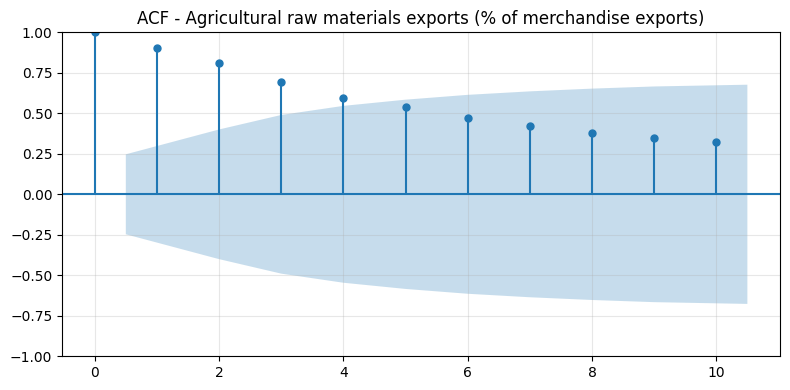


Indicator: Agricultural raw materials imports (% of merchandise imports)
ADF Statistic: -4.4610
p-value: 0.0002
Serie stazionaria, quindi plotto acf direttamente sui valori della time serie:


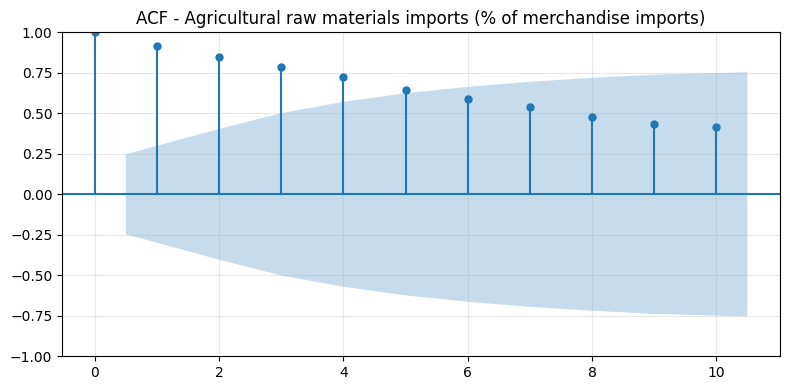


Indicator: Rural population (% of total population)
ADF Statistic: 0.6074
p-value: 0.9878
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -3.4010, p-value = 0.0109
Serie stazionaria dopo 1 differenziazioni.
   Year   Value   Diff
0  1960  40.639    NaN
1  1961  40.144 -0.495
2  1962  39.645 -0.499
3  1963  39.147 -0.498
4  1964  38.650 -0.497


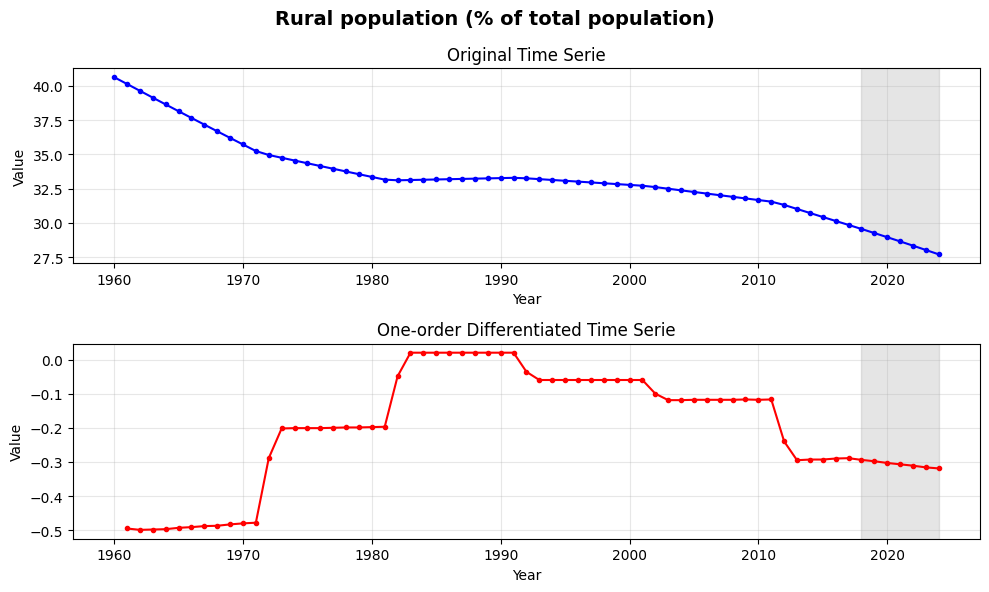

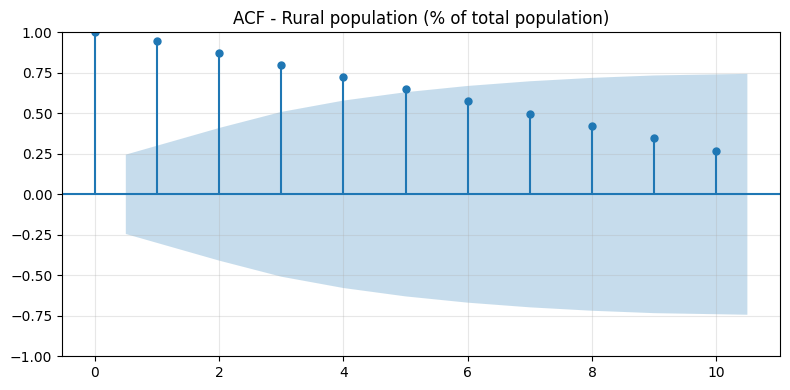


Indicator: Rural population growth (annual %)
ADF Statistic: -1.2740
p-value: 0.6410
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -7.6468, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year     Value      Diff
0  1961 -0.557139       NaN
1  1962 -0.574190 -0.017051
2  1963 -0.534554  0.039637
3  1964 -0.455075  0.079479
4  1965 -0.441649  0.013425


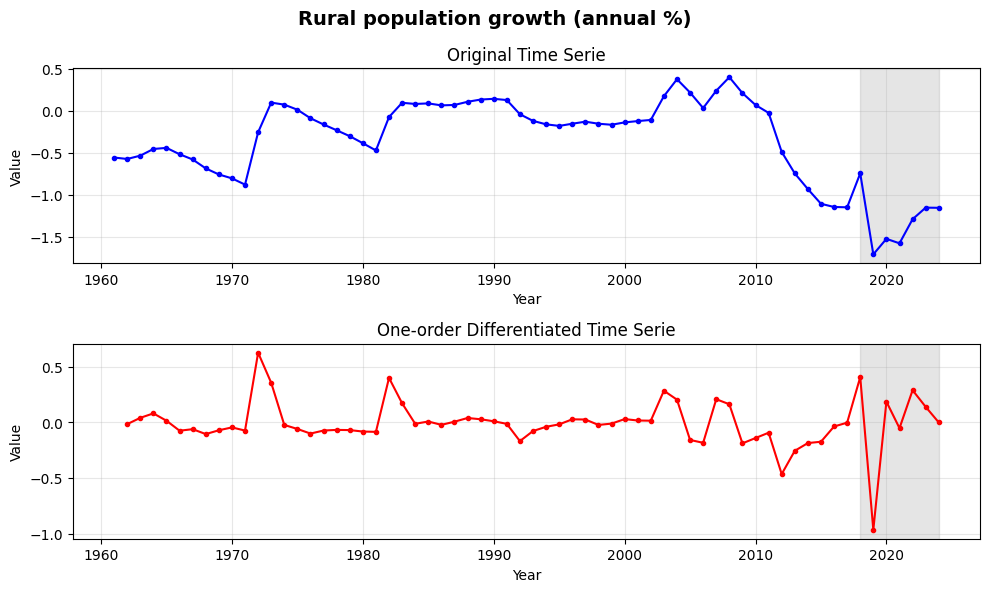

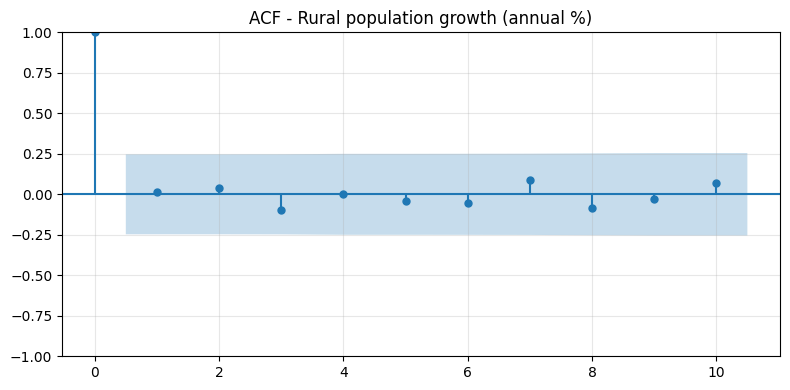


Indicator: Rural population
ADF Statistic: -0.0489
p-value: 0.9543
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -1.4383, p-value = 0.5638
Differenziazione n.2: ADF = -7.4670, p-value = 0.0000
Serie stazionaria dopo 2 differenziazioni.
   Year       Value     Diff
0  1960  20400656.0      NaN
1  1961  20287312.0      NaN
2  1962  20171158.0  -2810.0
3  1963  20063620.0   8616.0
4  1964  19972523.0  16441.0


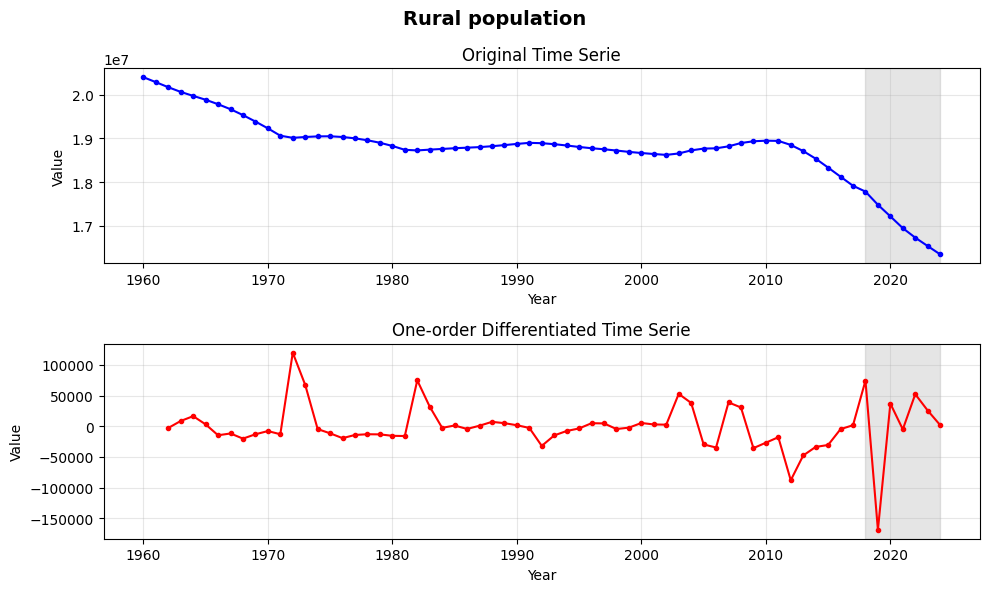

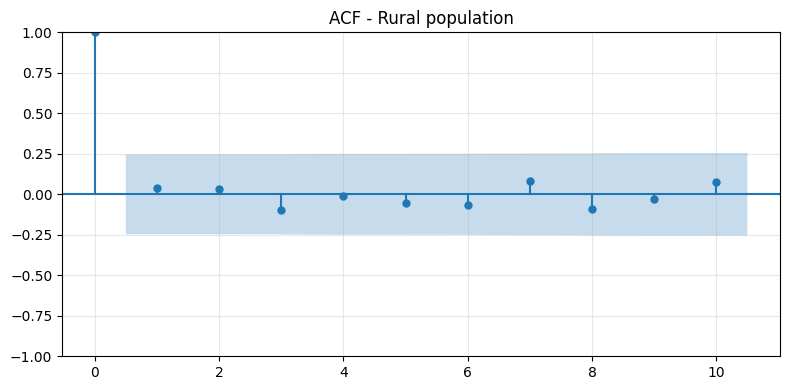


Indicator: Employment in agriculture (% of total employment) (modeled ILO estimate)
ADF Statistic: -5.5667
p-value: 0.0000
Serie stazionaria, quindi plotto acf direttamente sui valori della time serie:


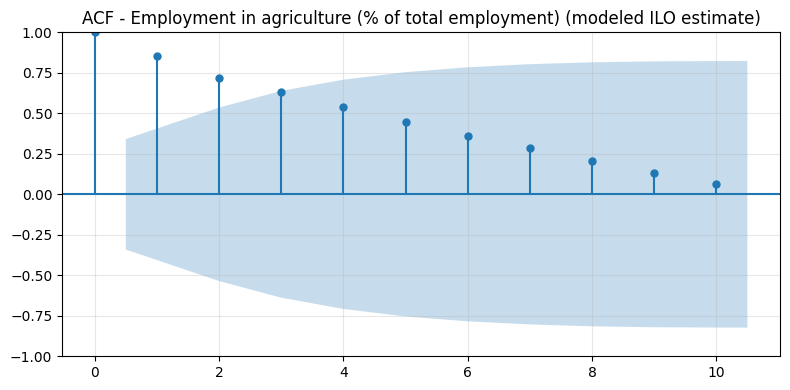


Indicator: Employment in agriculture, male (% of male employment) (modeled ILO estimate)
ADF Statistic: -4.0417
p-value: 0.0012
Serie stazionaria, quindi plotto acf direttamente sui valori della time serie:


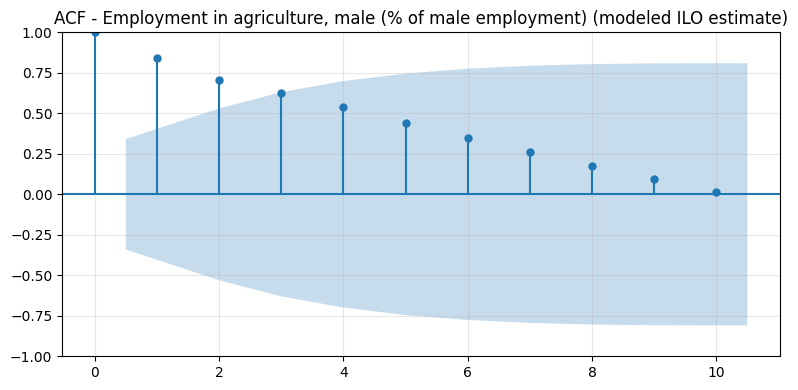


Indicator: Employment in agriculture, female (% of female employment) (modeled ILO estimate)
ADF Statistic: -3.9776
p-value: 0.0015
Serie stazionaria, quindi plotto acf direttamente sui valori della time serie:


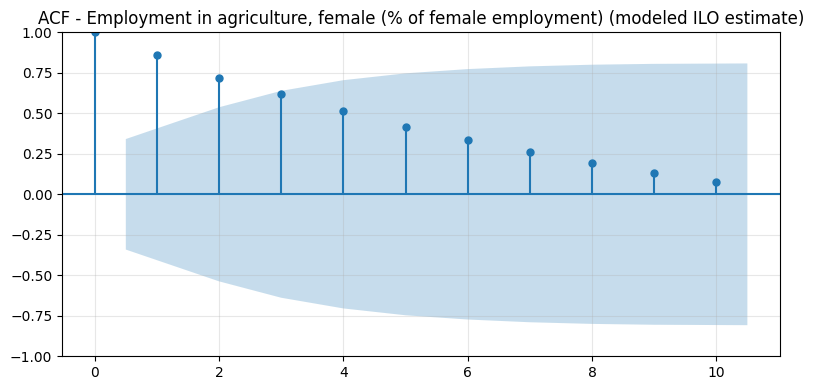


Indicator: Agriculture, forestry, and fishing, value added (% of GDP)
ADF Statistic: -2.0048
p-value: 0.2845
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -2.6704, p-value = 0.0793
Differenziazione n.2: ADF = -5.2062, p-value = 0.0000
Serie stazionaria dopo 2 differenziazioni.
   Year     Value      Diff
0  1990  3.178633       NaN
1  1991  3.235386       NaN
2  1992  3.114250 -0.177889
3  1993  2.995048  0.001933
4  1994  2.988089  0.112244


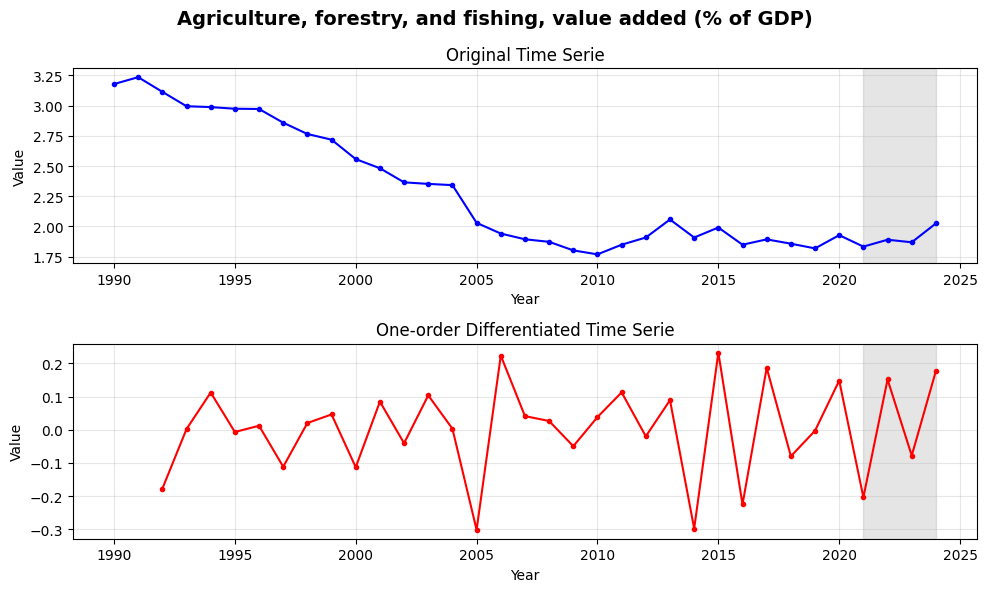

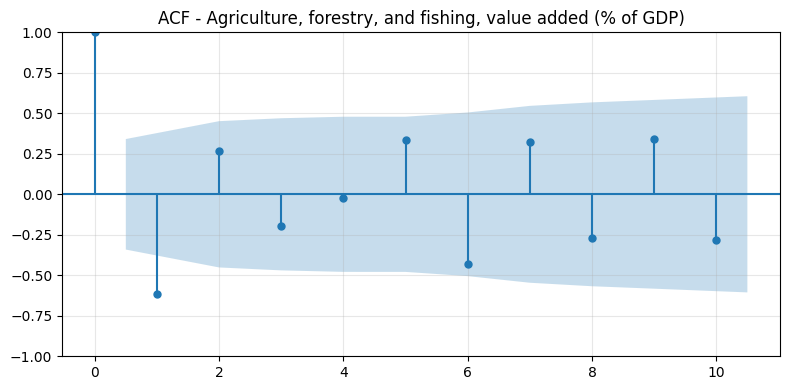


Indicator: Agriculture, forestry, and fishing, value added (current US$)
ADF Statistic: -2.1025
p-value: 0.2435
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -5.3026, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year         Value          Diff
0  1990  3.763327e+10           NaN
1  1991  4.041296e+10  2.779693e+09
2  1992  4.120790e+10  7.949339e+08
3  1993  3.196952e+10 -9.238378e+09
4  1994  3.292128e+10  9.517599e+08


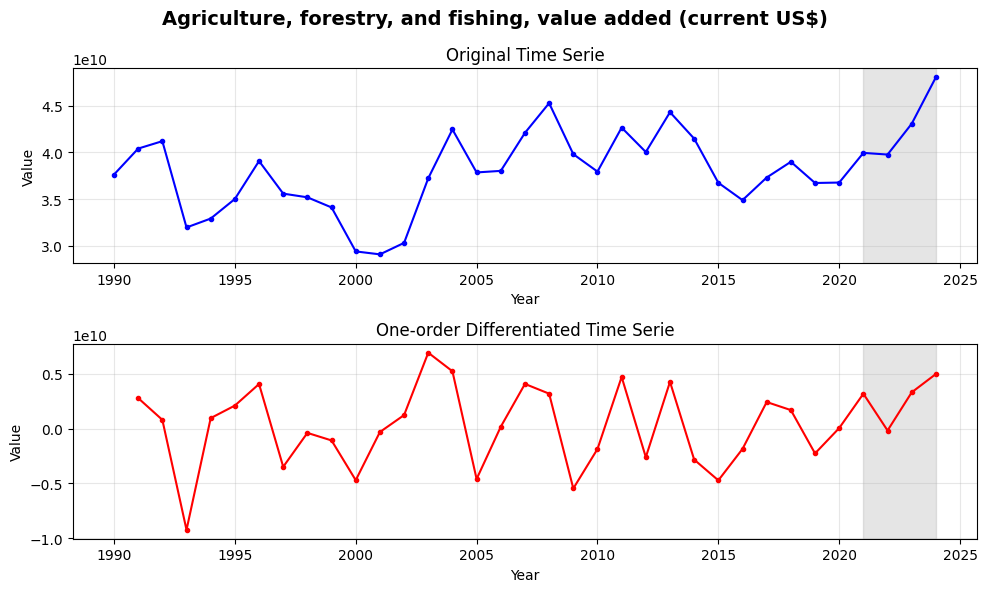

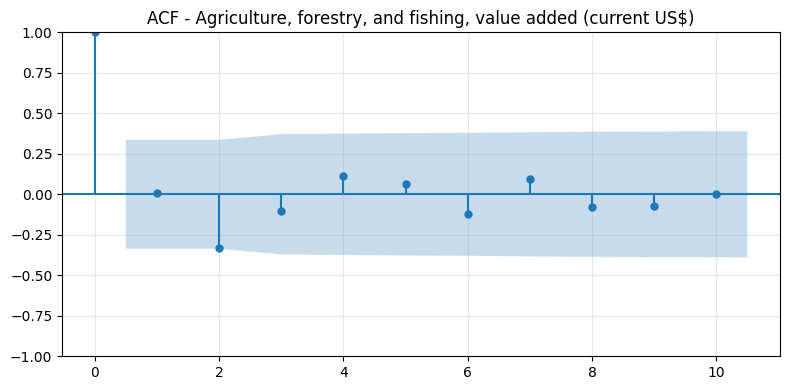


Indicator: Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)
ADF Statistic: -2.0918
p-value: 0.2478
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -9.3390, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year      Value      Diff
0  1970  61.538462       NaN
1  1971  60.354920 -1.183542
2  1972  59.201104 -1.153816
3  1973  58.075908 -1.125196
4  1974  56.978280 -1.097628


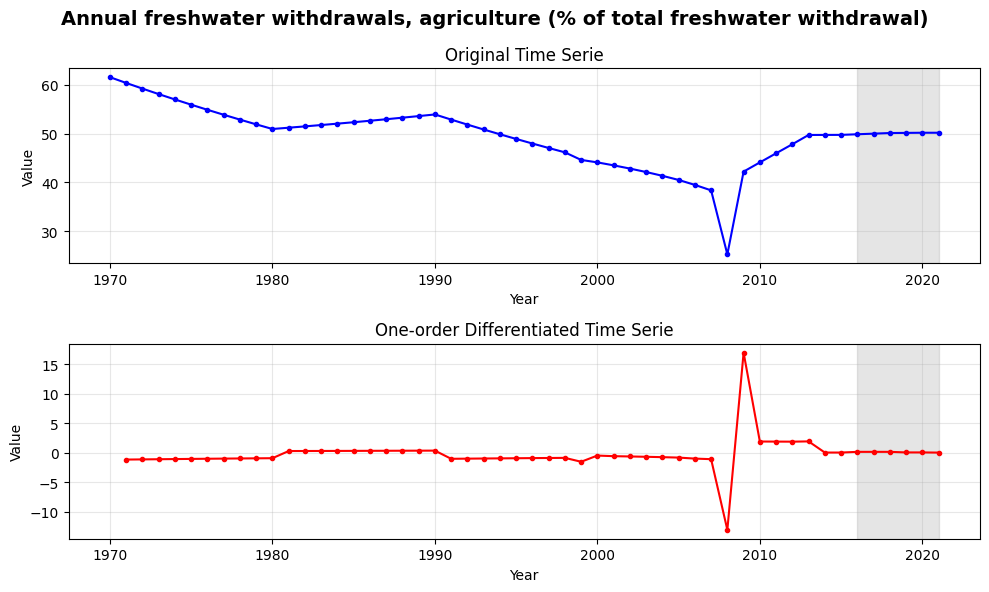

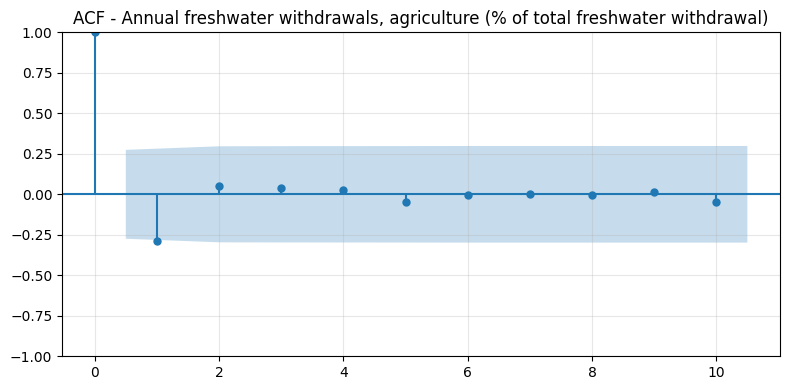


Indicator: Rural population living in areas where elevation is below 5 meters (% of total population)
Serie di Rural population living in areas where elevation is below 5 meters (% of total population) troppo corta: 3 osservazioni.

Indicator: Access to electricity, rural (% of rural population)
Errore nel test ADF per Access to electricity, rural (% of rural population): Invalid input, x is constant

Indicator: Cereal yield (kg per hectare)
ADF Statistic: -1.9385
p-value: 0.3142
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -10.5822, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year   Value   Diff
0  1961  2181.5    NaN
1  1962  2225.3   43.8
2  1963  2115.2 -110.1
3  1964  2243.0  127.8
4  1965  2399.3  156.3


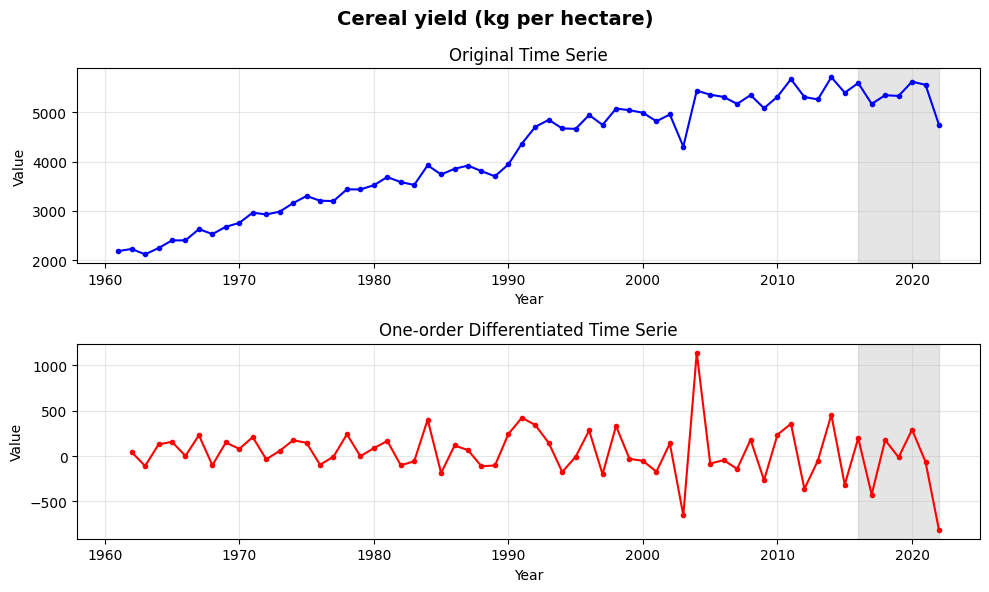

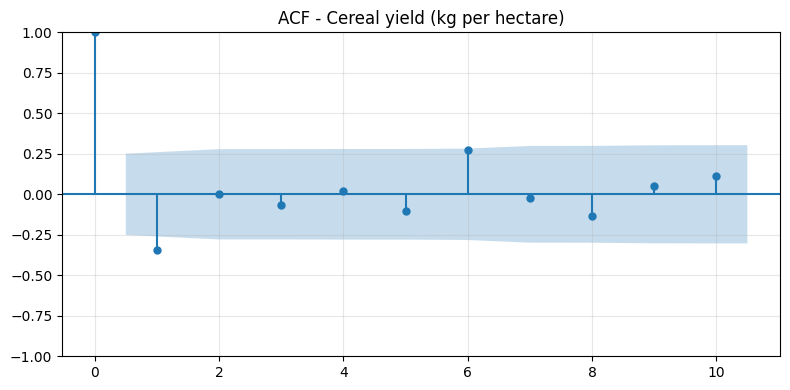


Indicator: Surface area (sq. km)
ADF Statistic: -0.7465
p-value: 0.8343
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -7.7463, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year     Value  Diff
0  1961  301340.0   NaN
1  1962  301340.0   0.0
2  1963  301340.0   0.0
3  1964  301340.0   0.0
4  1965  301340.0   0.0


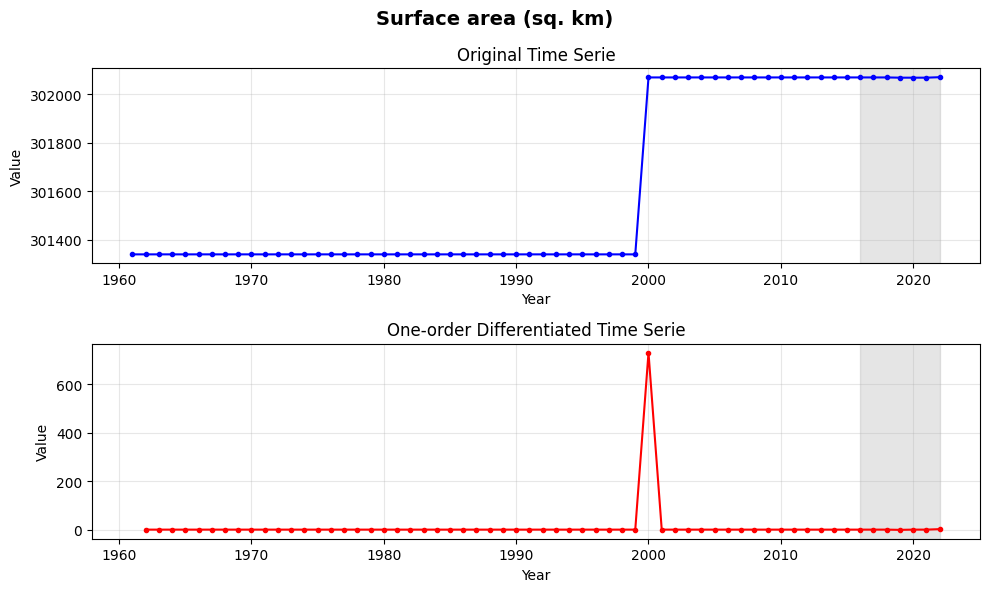

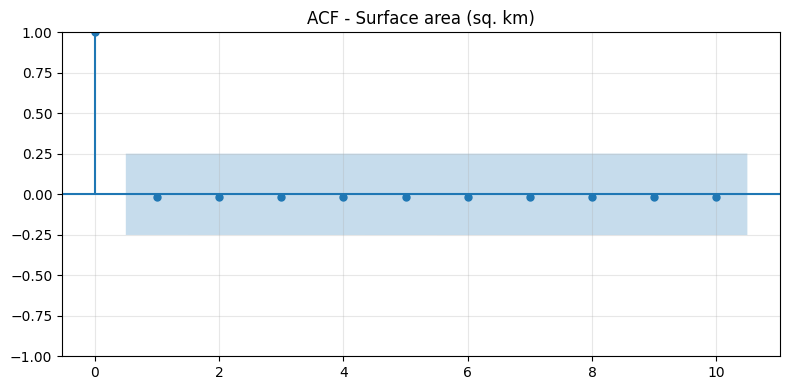


Indicator: Livestock production index (2014-2016 = 100)
ADF Statistic: -2.7642
p-value: 0.0636
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -4.0456, p-value = 0.0012
Serie stazionaria dopo 1 differenziazioni.
   Year  Value  Diff
0  1961  70.91   NaN
1  1962  72.59  1.68
2  1963  65.95 -6.64
3  1964  69.57  3.62
4  1965  72.80  3.23


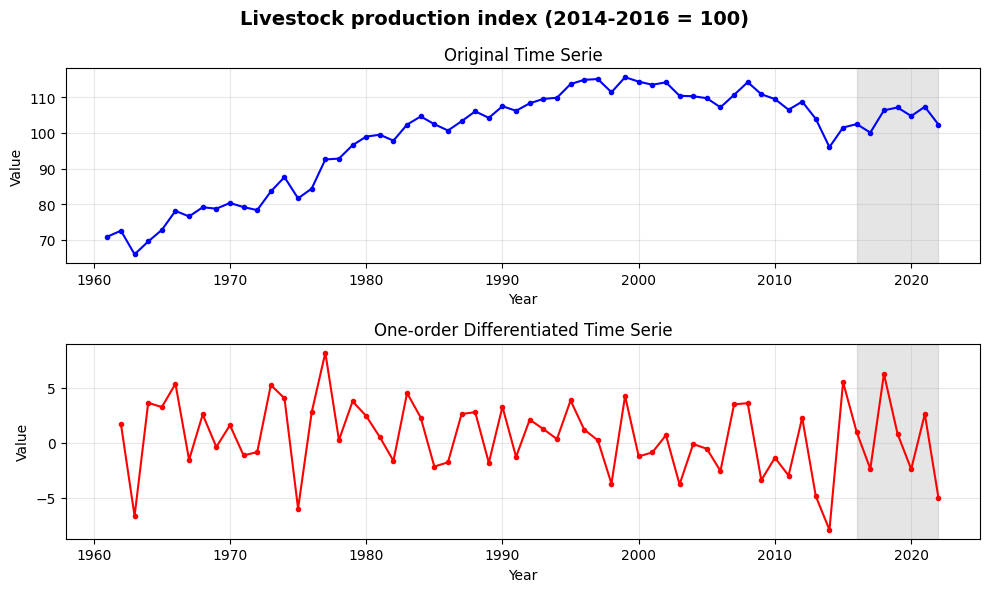

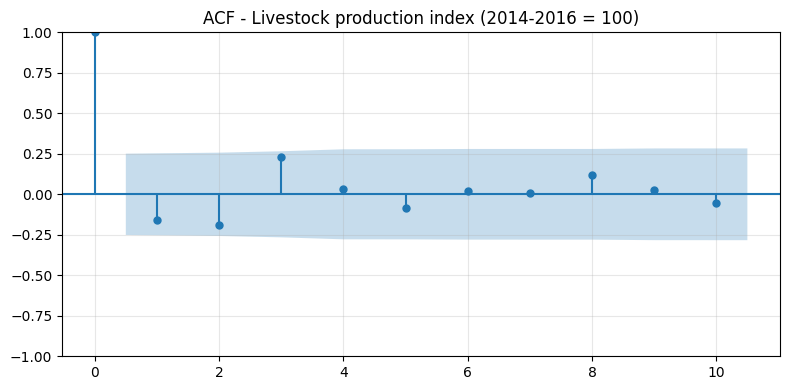


Indicator: Food production index (2014-2016 = 100)
ADF Statistic: -2.4827
p-value: 0.1198
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -6.4485, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year  Value  Diff
0  1961  85.93   NaN
1  1962  86.90  0.97
2  1963  86.37 -0.53
3  1964  90.28  3.91
4  1965  92.75  2.47


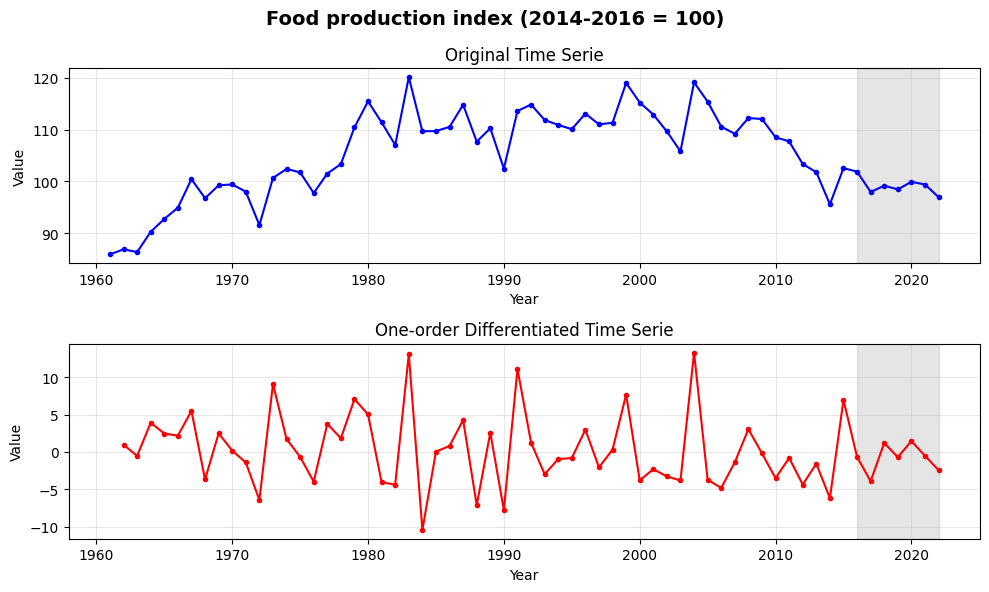

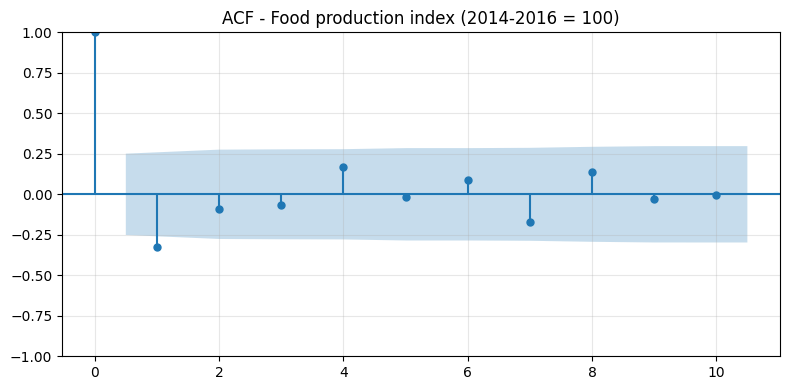


Indicator: Crop production index (2014-2016 = 100)
ADF Statistic: -1.2687
p-value: 0.6434
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -7.2662, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year   Value  Diff
0  1961   93.68   NaN
1  1962   94.43  0.75
2  1963   97.19  2.76
3  1964  101.31  4.12
4  1965  103.32  2.01


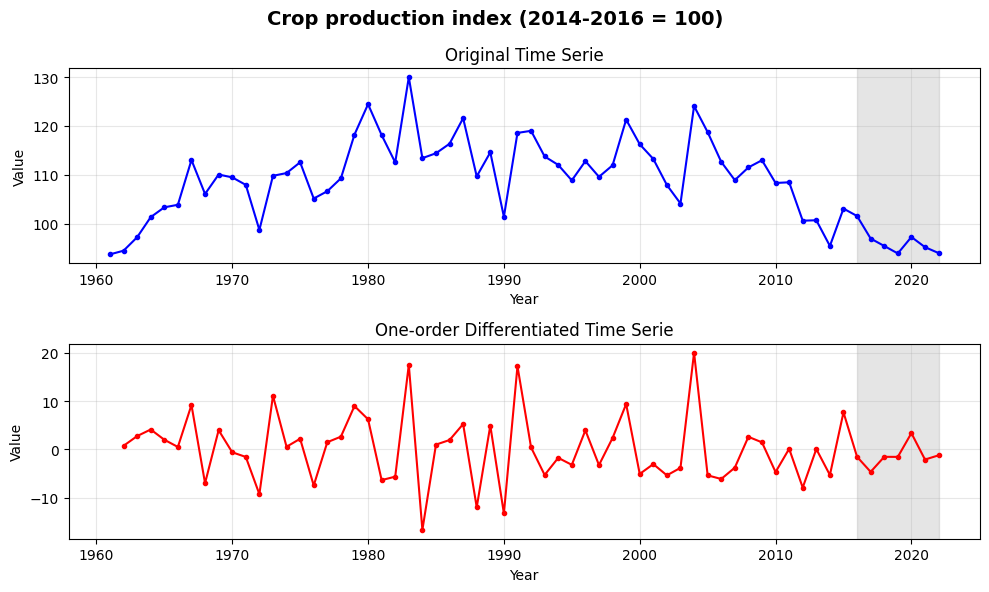

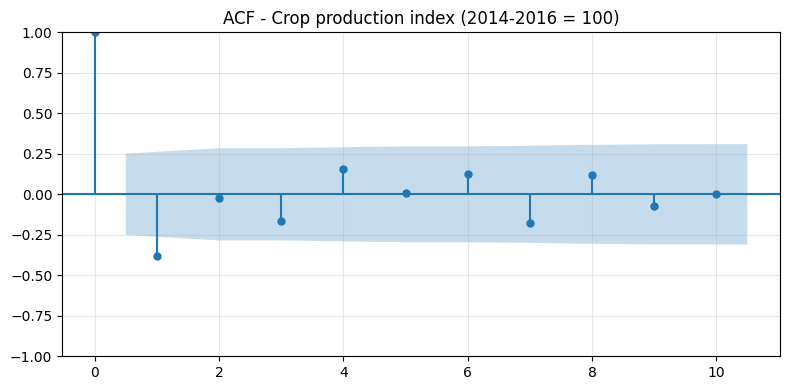


Indicator: Cereal production (metric tons)
ADF Statistic: -1.7578
p-value: 0.4016
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -8.3101, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year       Value       Diff
0  1961  13933400.0        NaN
1  1962  14433210.0   499810.0
2  1963  13324660.0 -1108550.0
3  1964  14007520.0   682860.0
4  1965  14531270.0   523750.0


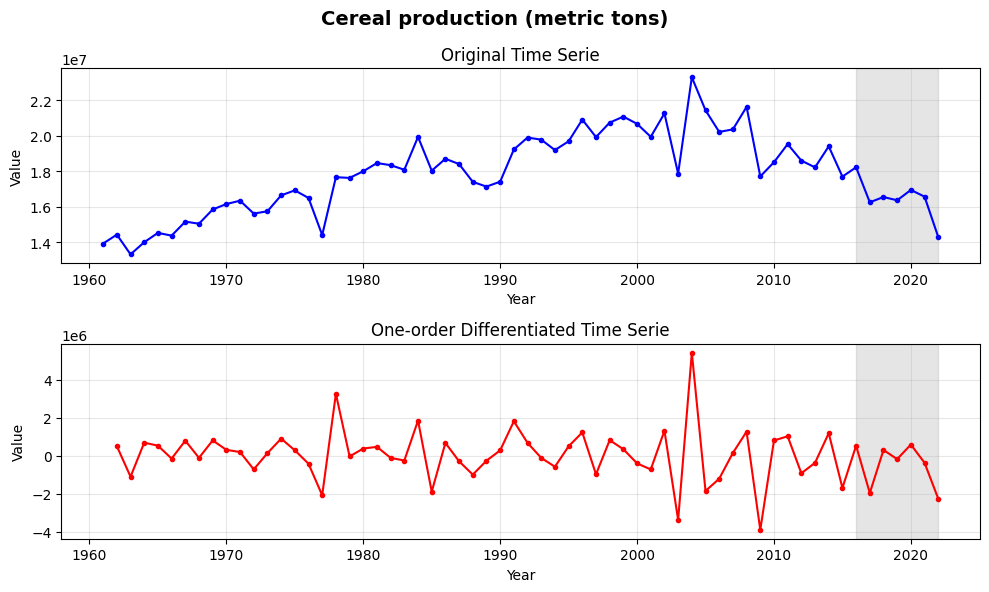

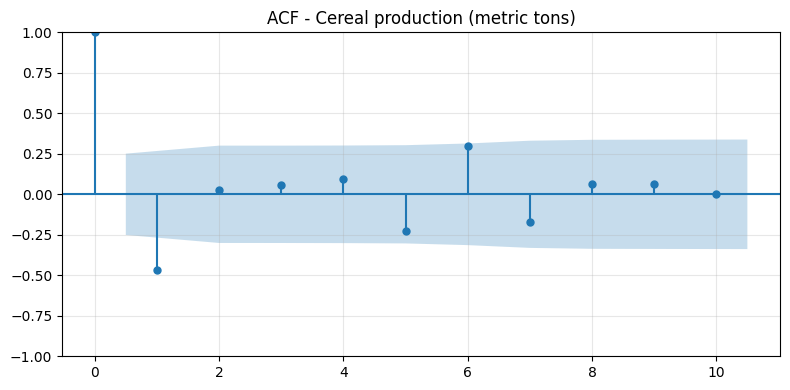


Indicator: Rural land area (sq. km)
Serie di Rural land area (sq. km) troppo corta: 3 osservazioni.

Indicator: Land area (sq. km)
ADF Statistic: -0.7467
p-value: 0.8343
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -7.7463, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year     Value  Diff
0  1961  294110.0   NaN
1  1962  294110.0   0.0
2  1963  294110.0   0.0
3  1964  294110.0   0.0
4  1965  294110.0   0.0


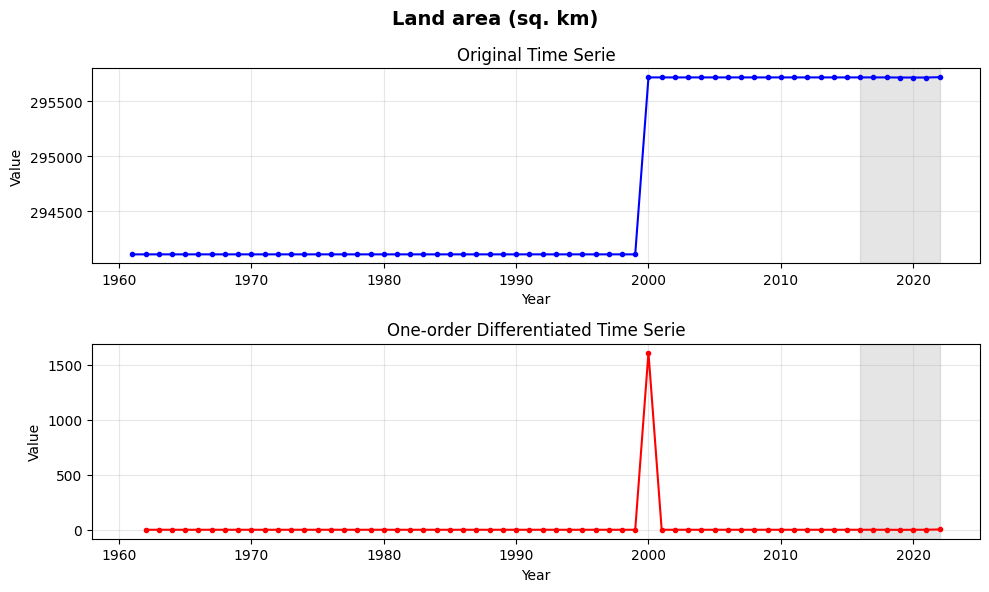

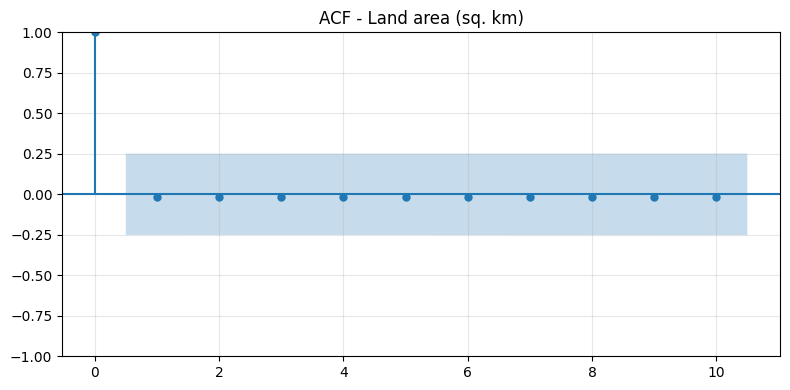


Indicator: Average precipitation in depth (mm per year)
Errore nel test ADF per Average precipitation in depth (mm per year): Invalid input, x is constant

Indicator: Agricultural irrigated land (% of total agricultural land)
Serie di Agricultural irrigated land (% of total agricultural land) troppo corta: 7 osservazioni.

Indicator: Forest area (% of land area)
ADF Statistic: -21.2138
p-value: 0.0000
Serie stazionaria, quindi plotto acf direttamente sui valori della time serie:


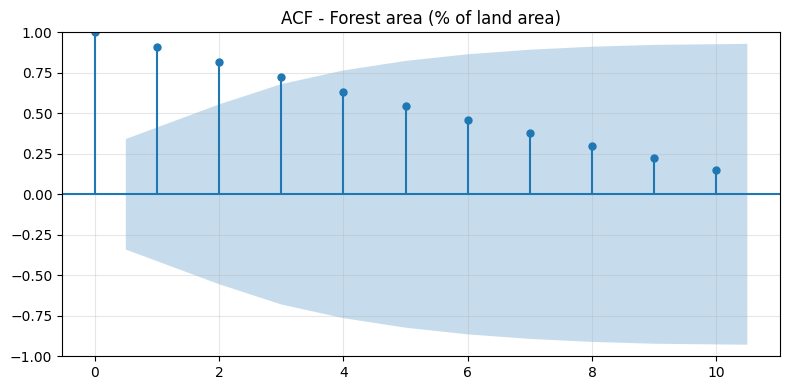


Indicator: Forest area (sq. km)
ADF Statistic: -2.6695
p-value: 0.0795
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -0.9289, p-value = 0.7783
Differenziazione n.2: ADF = -5.6839, p-value = 0.0000
Serie stazionaria dopo 2 differenziazioni.
   Year    Value  Diff
0  1990  75897.5   NaN
1  1991  76677.0   NaN
2  1992  77456.5   0.0
3  1993  78236.0   0.0
4  1994  79015.5   0.0


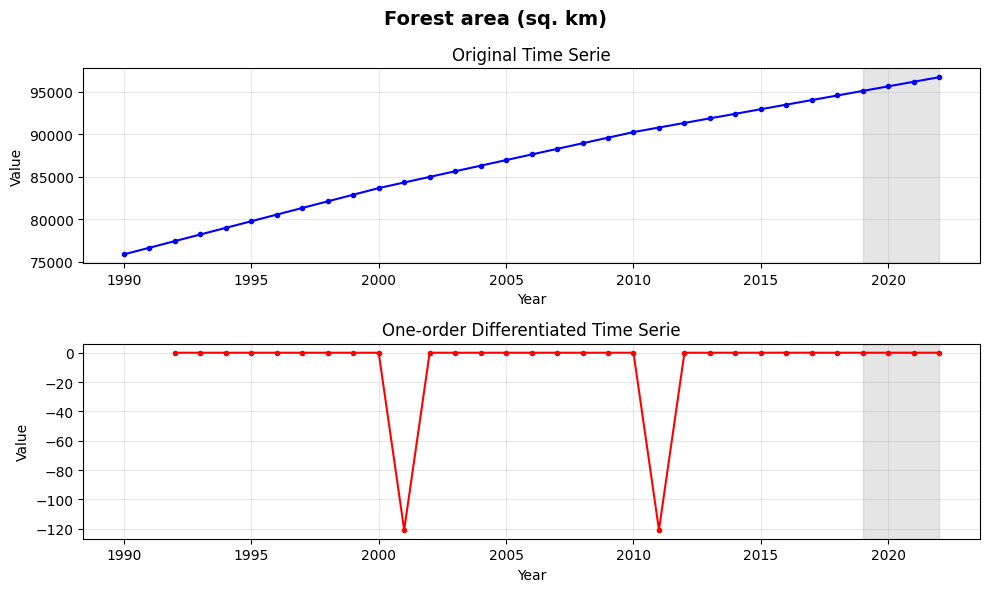

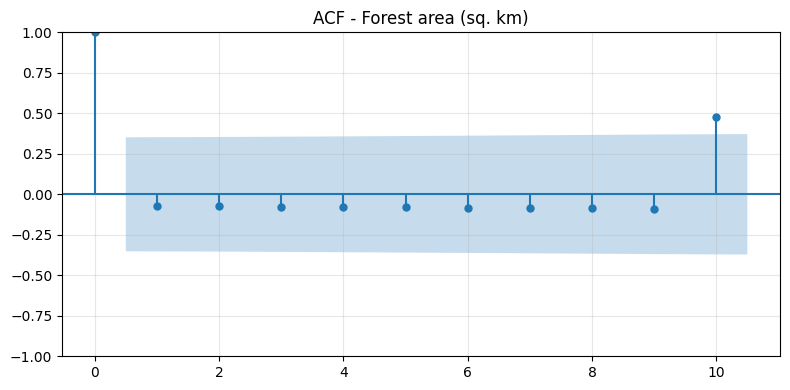


Indicator: Rural land area where elevation is below 5 meters (% of total land area)
Serie di Rural land area where elevation is below 5 meters (% of total land area) troppo corta: 3 osservazioni.

Indicator: Rural land area where elevation is below 5 meters (sq. km)
Serie di Rural land area where elevation is below 5 meters (sq. km) troppo corta: 3 osservazioni.

Indicator: Permanent cropland (% of land area)
ADF Statistic: -0.7408
p-value: 0.8359
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -5.0807, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year     Value      Diff
0  1961  9.336643       NaN
1  1962  9.435245  0.098603
2  1963  9.319642 -0.115603
3  1964  9.438645  0.119003
4  1965  9.445446  0.006800


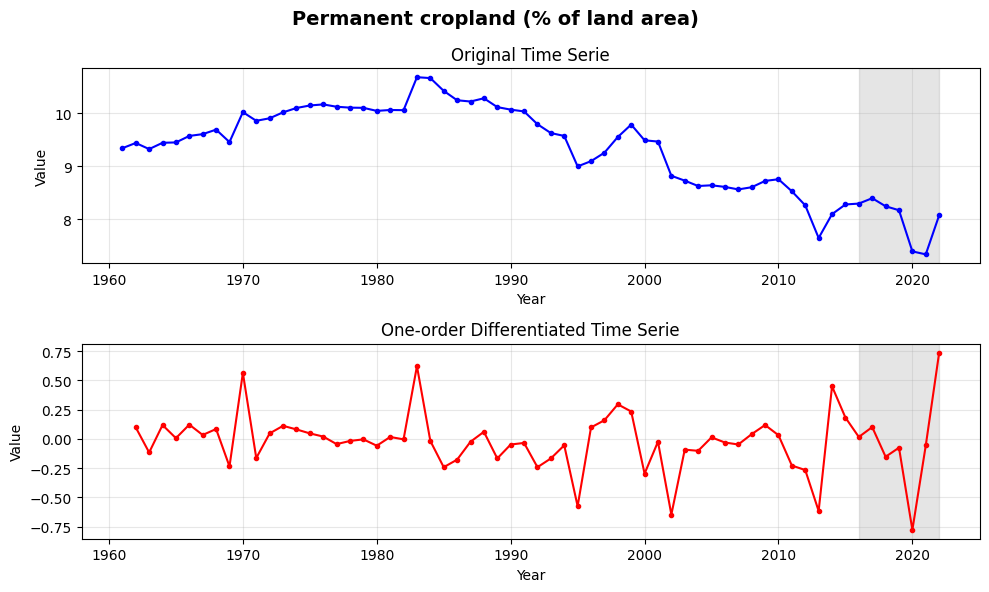

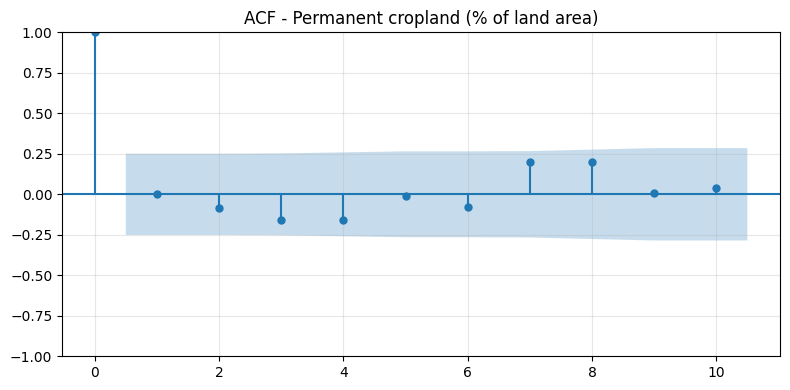


Indicator: Land under cereal production (hectares)
ADF Statistic: -1.3744
p-value: 0.5945
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -10.8306, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year      Value      Diff
0  1961  6387203.0       NaN
1  1962  6485855.0   98652.0
2  1963  6299467.0 -186388.0
3  1964  6244904.0  -54563.0
4  1965  6056518.0 -188386.0


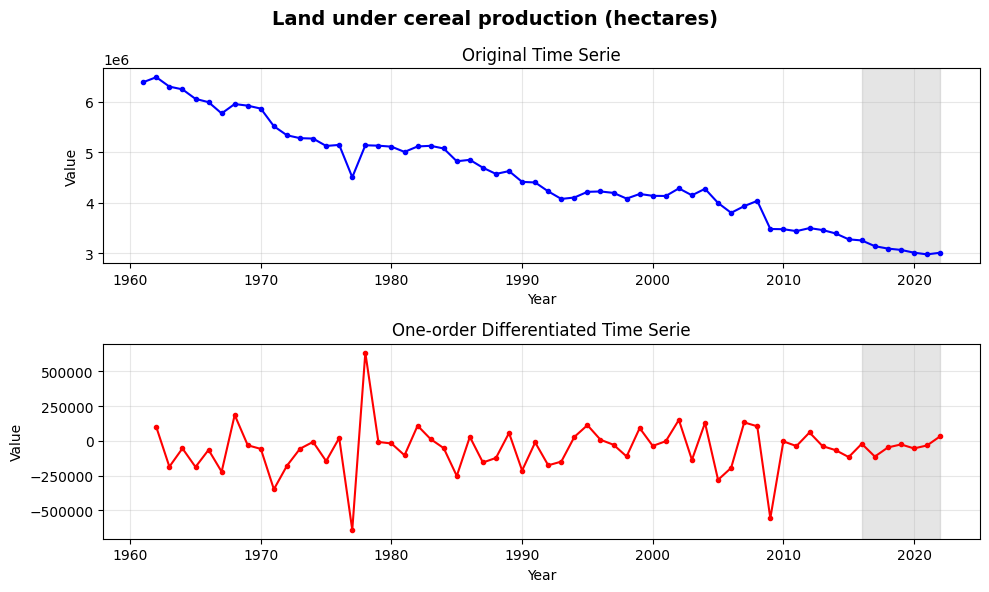

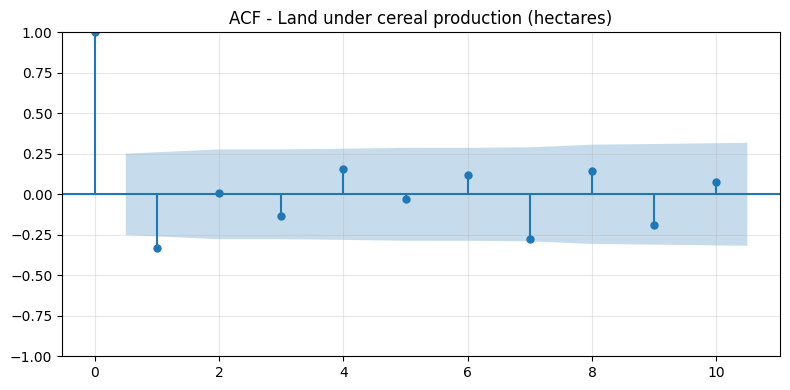


Indicator: Arable land (% of land area)
ADF Statistic: -2.0241
p-value: 0.2761
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -7.3582, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year      Value      Diff
0  1961  43.731937       NaN
1  1962  43.504131 -0.227806
2  1963  43.092720 -0.411411
3  1964  42.834314 -0.258407
4  1965  42.582707 -0.251607


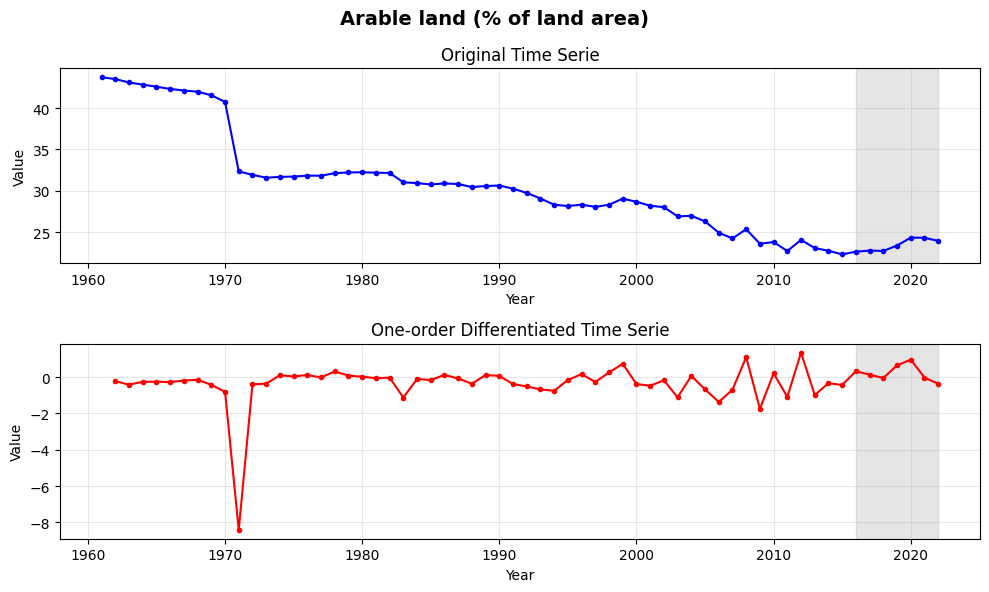

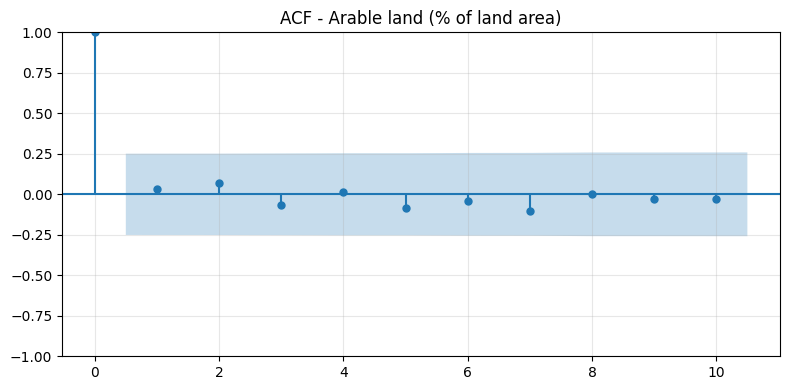


Indicator: Arable land (hectares per person)
ADF Statistic: -2.5940
p-value: 0.0942
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -4.4399, p-value = 0.0003
Serie stazionaria dopo 1 differenziazioni.
   Year     Value      Diff
0  1961  0.254510       NaN
1  1962  0.251477 -0.003033
2  1963  0.247288 -0.004189
3  1964  0.243791 -0.003497
4  1965  0.240327 -0.003464


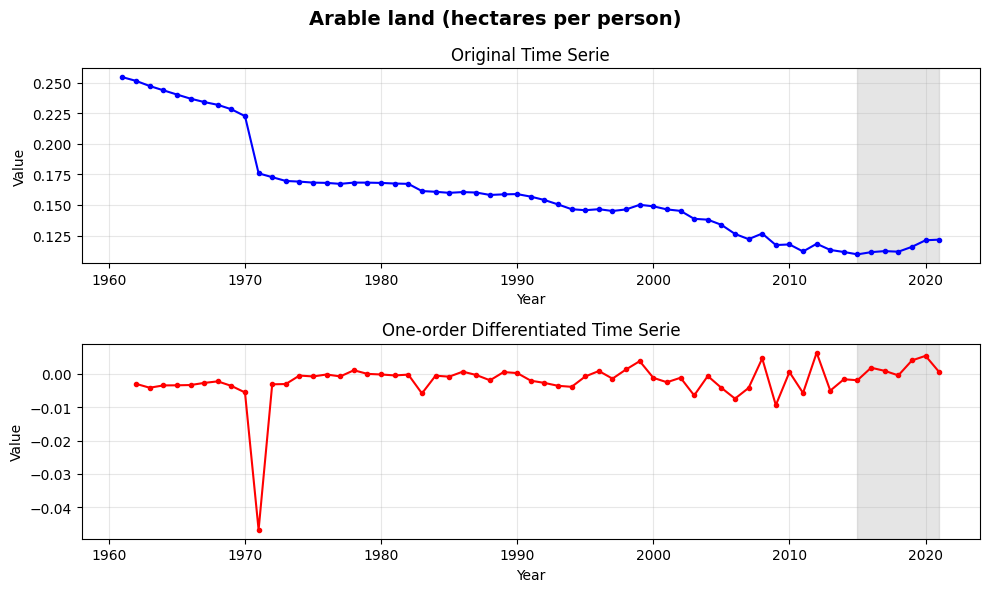

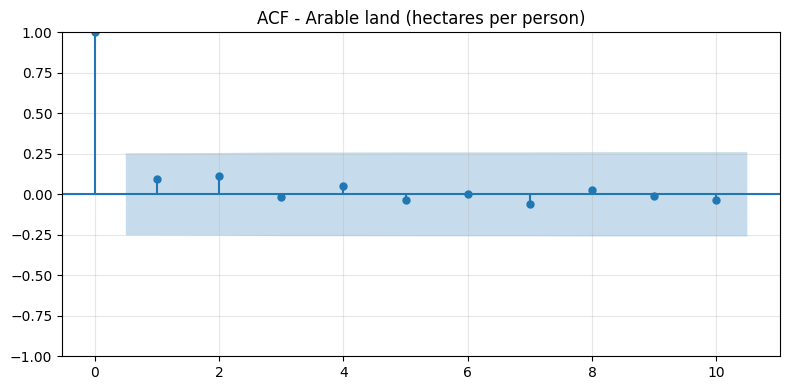


Indicator: Arable land (hectares)
ADF Statistic: -2.0418
p-value: 0.2686
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -7.2816, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year       Value      Diff
0  1961  12862000.0       NaN
1  1962  12795000.0  -67000.0
2  1963  12674000.0 -121000.0
3  1964  12598000.0  -76000.0
4  1965  12524000.0  -74000.0


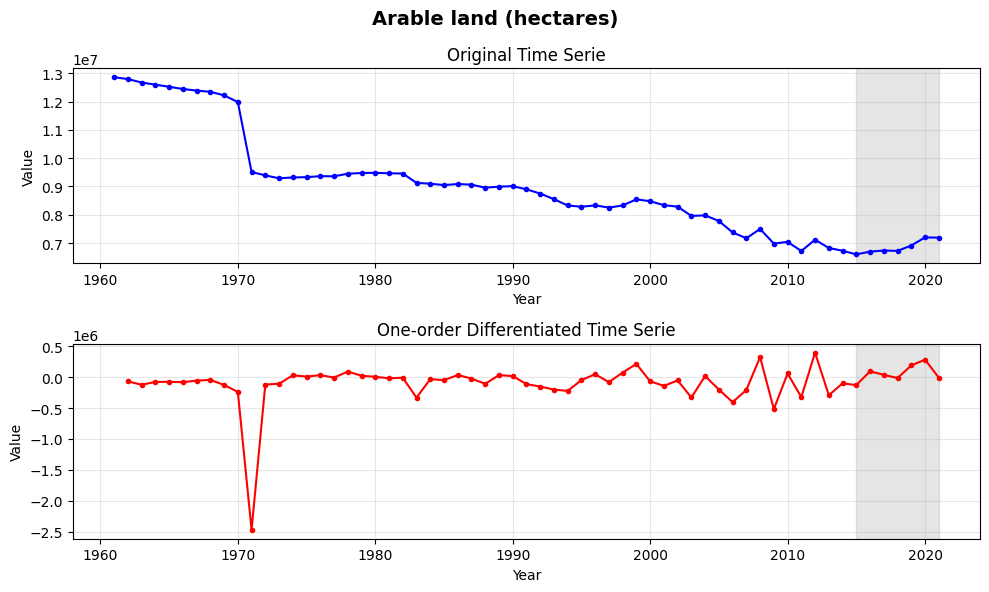

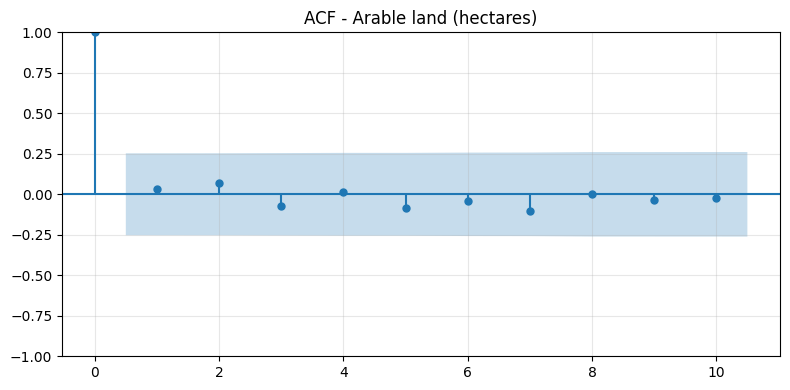


Indicator: Agricultural land (% of land area)
ADF Statistic: -1.2346
p-value: 0.6585
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -8.4019, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year      Value      Diff
0  1961  70.324028       NaN
1  1962  70.218626 -0.105403
2  1963  69.735813 -0.482813
3  1964  69.572609 -0.163204
4  1965  69.497807 -0.074802


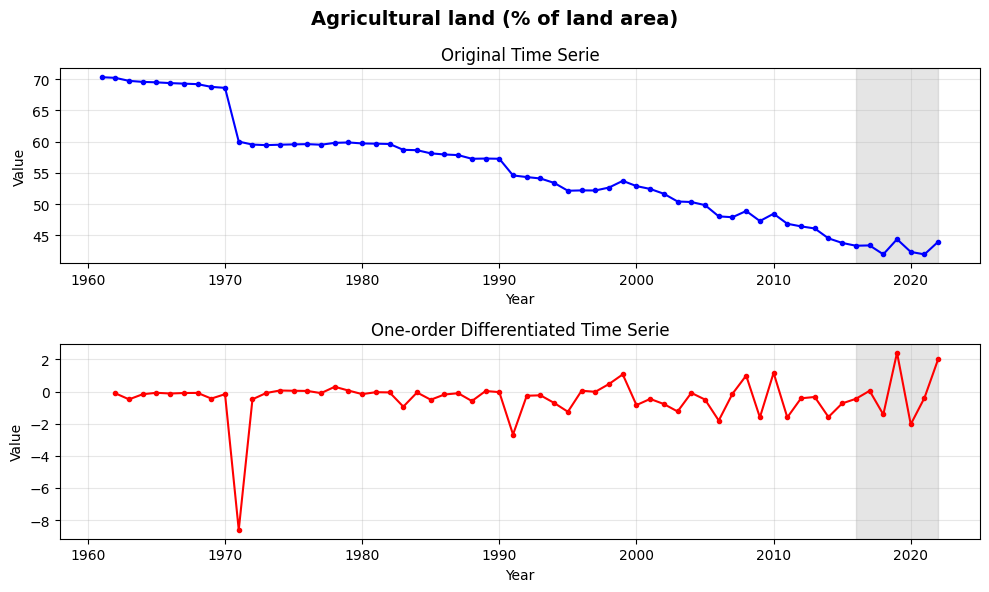

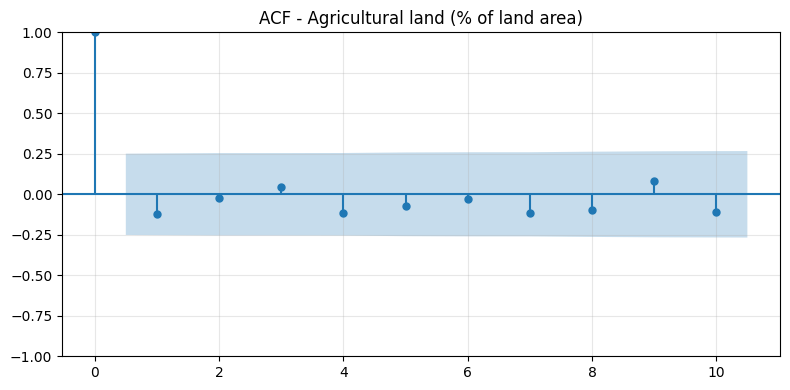


Indicator: Agricultural land (sq. km)
ADF Statistic: -0.8888
p-value: 0.7916
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -8.5663, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year     Value    Diff
0  1961  206830.0     NaN
1  1962  206520.0  -310.0
2  1963  205100.0 -1420.0
3  1964  204620.0  -480.0
4  1965  204400.0  -220.0


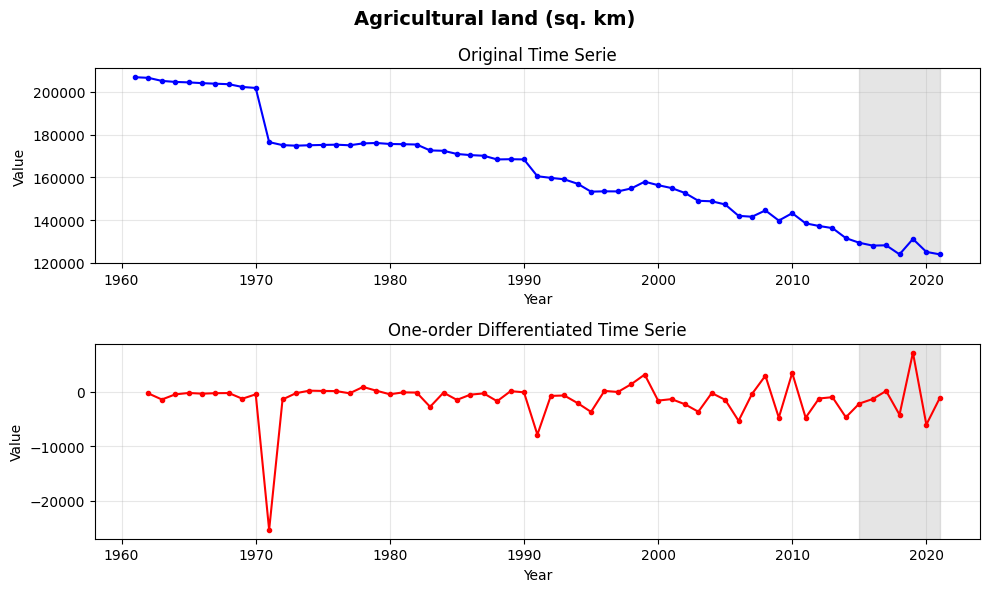

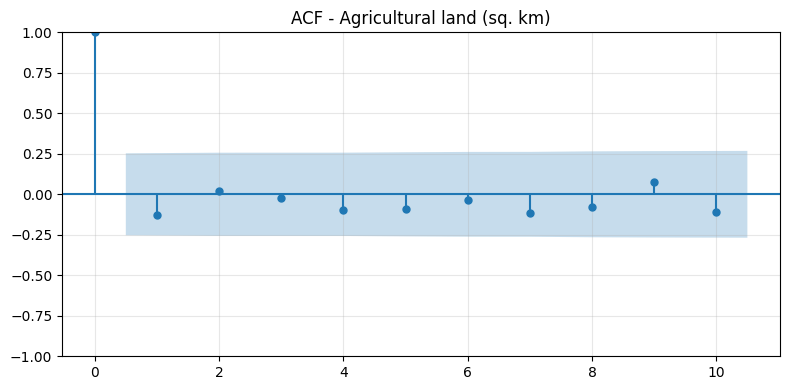


Indicator: Fertilizer consumption (kilograms per hectare of arable land)
ADF Statistic: -2.4464
p-value: 0.1291
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -1.1675, p-value = 0.6874
Differenziazione n.2: ADF = -5.6761, p-value = 0.0000
Serie stazionaria dopo 2 differenziazioni.
   Year      Value      Diff
0  1961  67.795055       NaN
1  1962  69.362485       NaN
2  1963  68.764636 -2.165279
3  1964  74.639625  6.472838
4  1965  86.395481  5.880866


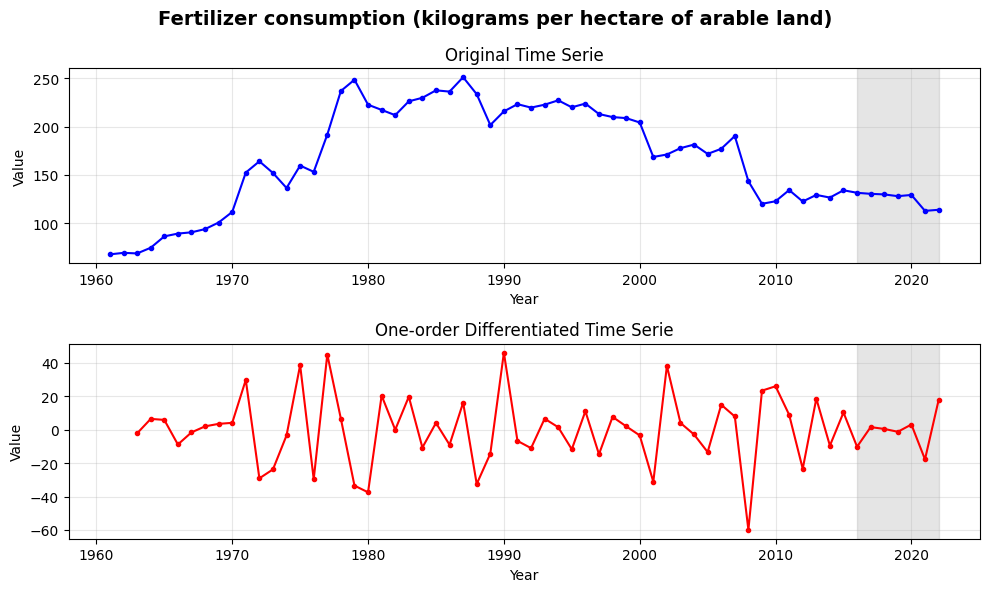

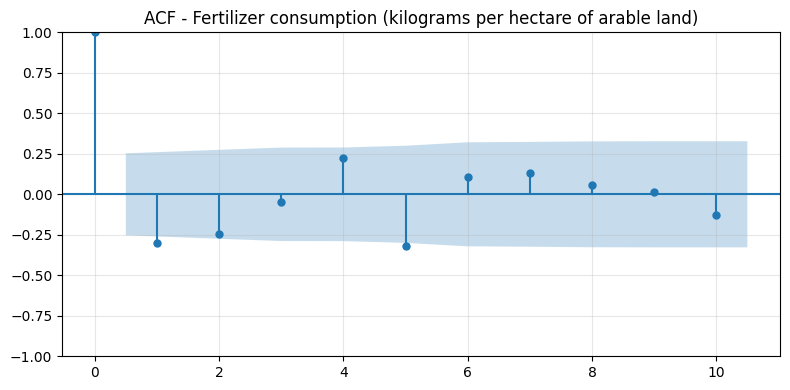


Indicator: Fertilizer consumption (% of fertilizer production)
ADF Statistic: -1.5620
p-value: 0.5027
Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:
Differenziazione n.1: ADF = -7.5112, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
   Year      Value      Diff
0  1961  72.707716       NaN
1  1962  70.071359 -2.636357
2  1963  63.883735 -6.187623
3  1964  64.593354  0.709619
4  1965  68.034311  3.440957


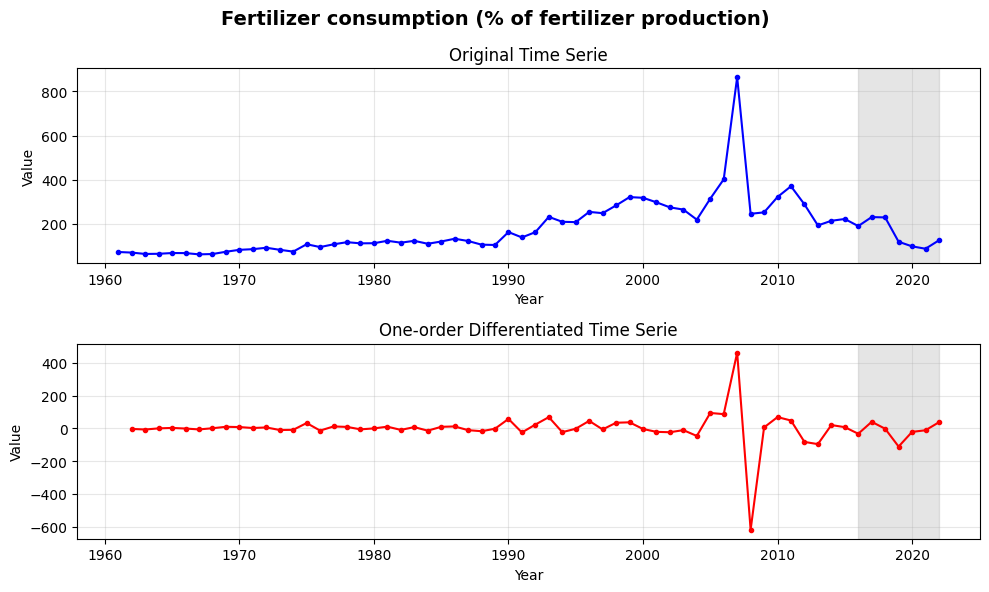

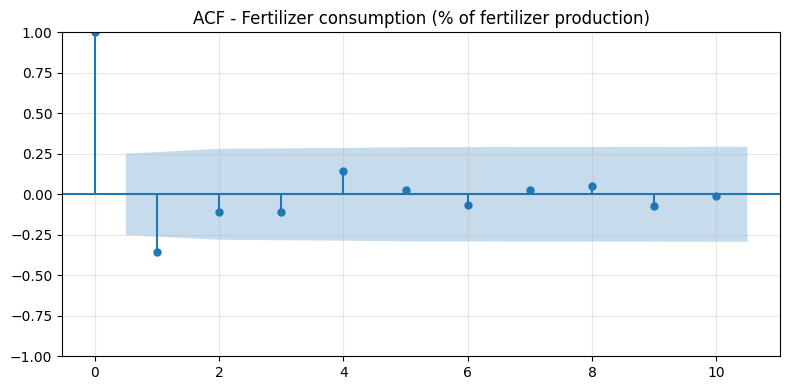

In [3]:
indicators = df["Indicator Name"].unique()

for indicator in indicators:
    print(f"\n{'='*80}")
    print(f"Indicator: {indicator}")

    df_temp = (
        df[df["Indicator Name"] == indicator]
        .melt(id_vars=["Indicator Name"], var_name="Year", value_name="Value")
        .assign(Year=lambda d: d["Year"].astype(int))
        .dropna(subset=["Value"])
        [["Year", "Value"]]
        .reset_index(drop=True)
    )

    if df_temp.empty:
        print("Nessun dato disponibile, salto.")
        continue
    
    if len(df_temp) < 20:
        print(f"Serie di {indicator} troppo corta: {len(df_temp)} osservazioni.")
        continue

    try:
        result = adfuller(df_temp['Value'].dropna())
        adf_stat, p_value = result[0], result[1]
        print(f"ADF Statistic: {adf_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
    except ValueError as e:
        print(f"Errore nel test ADF per {indicator}: {e}")
        continue
    
    if (result[1] < 0.05) :
        print("Serie stazionaria, quindi plotto acf direttamente sui valori della time serie:")
        # PLOT ACF directly on values
        fig, ax = plt.subplots(figsize=(8, 4))
        plot_acf(df_temp["Value"].dropna(), lags=10, ax=ax)
        ax.set_title(f"ACF - {indicator}")
        ax.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Serie non stazionaria, quindi differenzio e plotto acf sui valori della time serie differenziati:")      
        diff_count = 0
        current_series = df_temp['Value'].copy()
        while diff_count < 4:
            current_series = current_series.diff()
            result = adfuller(current_series.dropna())
            adf_stat, p_value = result[0], result[1]
            print(f"Differenziazione n.{diff_count+1}: ADF = {adf_stat:.4f}, p-value = {p_value:.4f}")
            if p_value < 0.05:
                print(f"Serie stazionaria dopo {diff_count+1} differenziazioni.")
                df_temp['Diff'] = current_series
                break
            else:
                diff_count += 1
        print(df_temp.head())

        # PLOT ORIGINAL TIME SERIE VS DIFFERENTIATED TIME SERIE
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize = (10,6))
        fig.suptitle(f"{indicator}", fontsize=14, fontweight="bold")
        ax1.plot(df_temp['Year'], df_temp['Value'], 'b-', marker='.')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Value')
        ax1.set_title('Original Time Serie')
        ax1.grid(True, alpha=0.3)
        ax1.axvspan(df_temp['Year'][int(0.9*len(df_temp))], df_temp['Year'][len(df_temp)-1], color='#808080', alpha=0.2)
        
        ax2.plot(df_temp['Year'], df_temp['Diff'], 'r-', marker='.')
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Value')
        ax2.set_title('One-order Differentiated Time Serie')
        ax2.grid(True, alpha=0.3)
        ax2.axvspan(df_temp['Year'][int(0.9*len(df_temp))], df_temp['Year'][len(df_temp)-1], color='#808080', alpha=0.2)

        ax1.tick_params(labelbottom=True)
        ax2.tick_params(labelbottom=True) 
        plt.setp(ax2.get_xticklabels(), visible=True) 
        plt.tight_layout()
        plt.show()
        
        # PLOT ACF on differenced values
        fig, ax = plt.subplots(figsize=(8, 4))
        plot_acf(df_temp["Diff"].dropna(), lags=10, ax=ax)
        ax.set_title(f"ACF - {indicator}")
        ax.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()


Indicator: Rural population growth (annual %)
ADF Statistic: -1.2740
p-value: 0.6410
Differenziazione n.1: ADF = -7.6468, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 51, Test: 13
Diff data - Train: 51, 
    Year     Value      Diff
0  1961 -0.557139       NaN
1  1962 -0.574190 -0.017051
2  1963 -0.534554  0.039637
3  1964 -0.455075  0.079479
4  1965 -0.441649  0.013425, 
 Test: 13, 
     Year     Value      Diff
51  2012 -0.489946 -0.466029
52  2013 -0.746706 -0.256759
53  2014 -0.933930 -0.187224
54  2015 -1.109249 -0.175319
55  2016 -1.147508 -0.038259


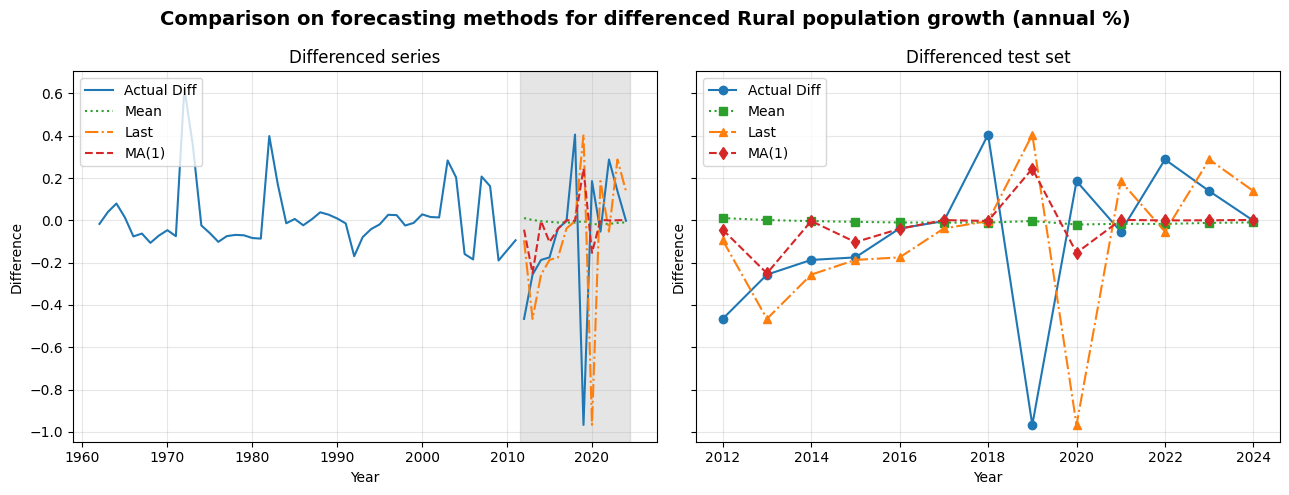


=== Year alignment check ===
test_results Years: [2012, 2013, 2014, 2015, 2016]  ...  [2022, 2023, 2024]
test_original Years: [2012, 2013, 2014, 2015, 2016]  ...  [2022, 2023, 2024]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [-0.4660289  -0.25675918 -0.18722428 -0.17531904 -0.03825897]
reconstructed: [251.87546825 251.61870907 251.4314848  251.25616576 251.21790679]
actual test_original first k values: [-0.48994634 -0.74670552 -0.93392979 -1.10924883 -1.1475078 ]
last obs: [np.float64(-0.023917439709615206)]


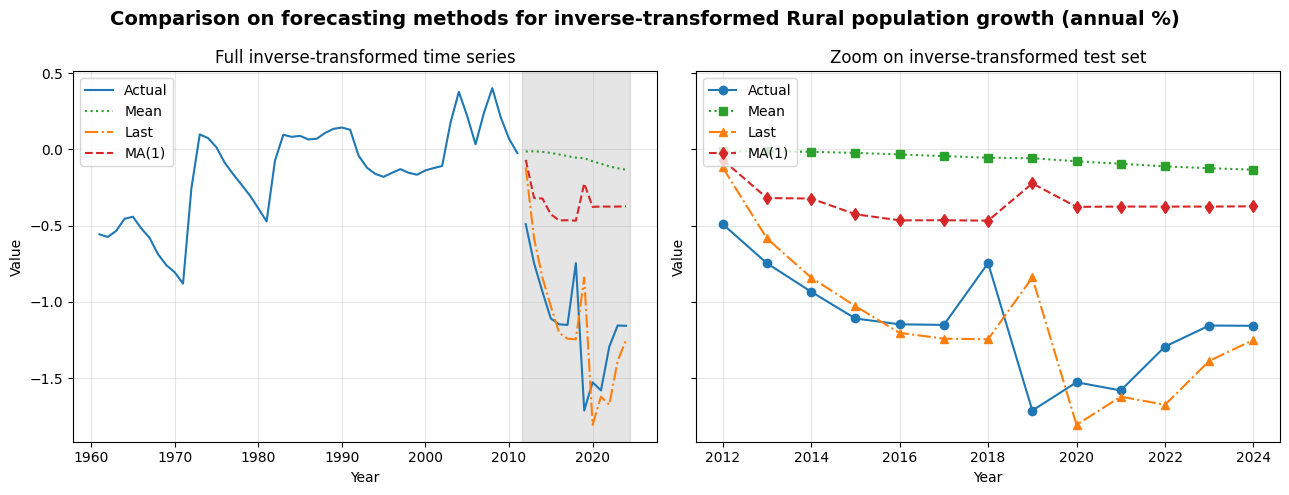


Indicator: Rural population
ADF Statistic: -0.0489
p-value: 0.9543
Differenziazione n.1: ADF = -1.4383, p-value = 0.5638
Differenziazione n.2: ADF = -7.4670, p-value = 0.0000
Serie stazionaria dopo 2 differenziazioni.
Original data - Train: 52, Test: 13
Diff data - Train: 51, 
    Year       Value     Diff
0  1960  20400656.0      NaN
1  1961  20287312.0      NaN
2  1962  20171158.0  -2810.0
3  1963  20063620.0   8616.0
4  1964  19972523.0  16441.0, 
 Test: 14, 
     Year       Value     Diff
51  2011  18942070.0 -17858.0
52  2012  18849491.0 -88048.0
53  2013  18709265.0 -47647.0
54  2014  18535347.0 -33692.0
55  2015  18330880.0 -30549.0


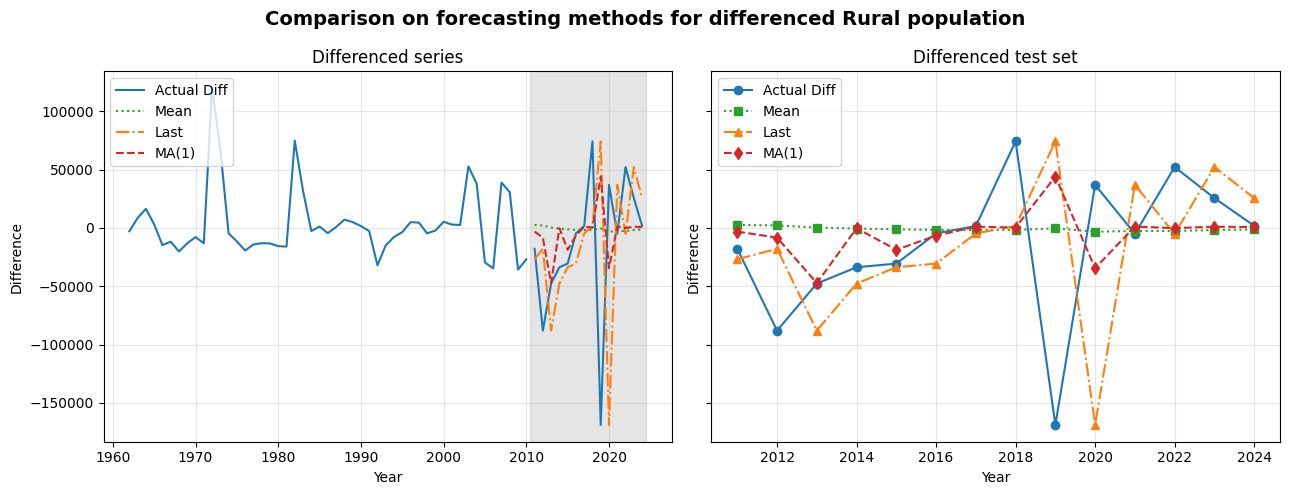


=== Year alignment check ===
test_results Years: [2011, 2012, 2013, 2014, 2015]  ...  [2022, 2023, 2024]
test_original Years: [2012, 2013, 2014, 2015, 2016]  ...  [2022, 2023, 2024]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [-17858. -88048. -47647. -33692. -30549.]
reconstructed: [ -17858.02391744 -105906.02391744 -153553.02391744 -187245.02391744
 -217794.02391744]
actual test_original first k values: [18849491. 18709265. 18535347. 18330880. 18121734.]
last obs: [np.float64(18942070.0)]


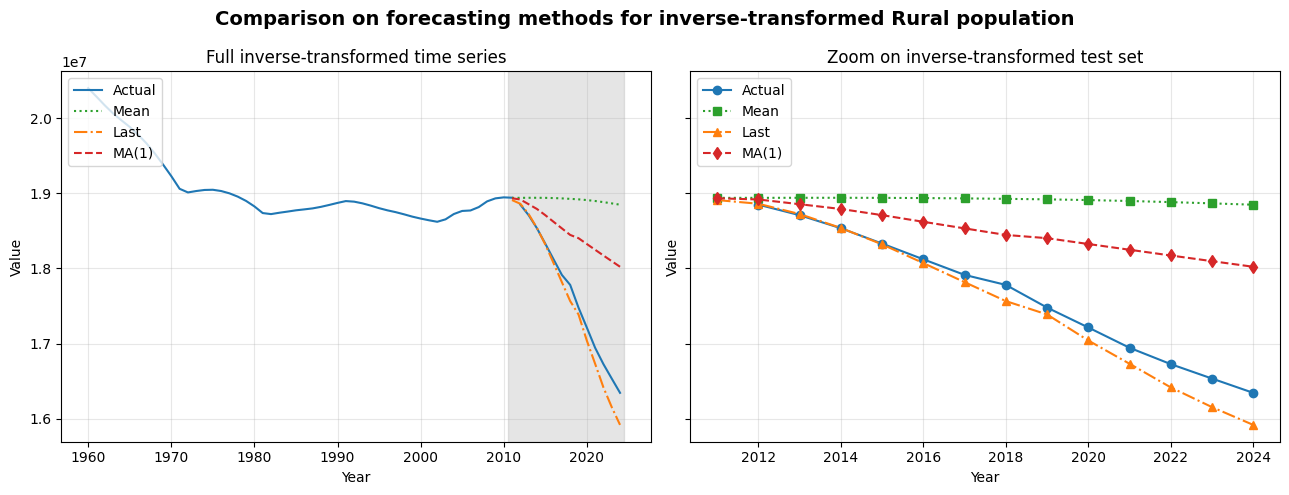


Indicator: Agriculture, forestry, and fishing, value added (% of GDP)
ADF Statistic: -2.0048
p-value: 0.2845
Differenziazione n.1: ADF = -2.6704, p-value = 0.0793
Differenziazione n.2: ADF = -5.2062, p-value = 0.0000
Serie stazionaria dopo 2 differenziazioni.
Original data - Train: 28, Test: 7
Diff data - Train: 27, 
    Year     Value      Diff
0  1990  3.178633       NaN
1  1991  3.235386       NaN
2  1992  3.114250 -0.177889
3  1993  2.995048  0.001933
4  1994  2.988089  0.112244, 
 Test: 8, 
     Year     Value      Diff
27  2017  1.893433  0.186653
28  2018  1.857556 -0.080157
29  2019  1.818669 -0.003011
30  2020  1.928016  0.148235
31  2021  1.833393 -0.203971


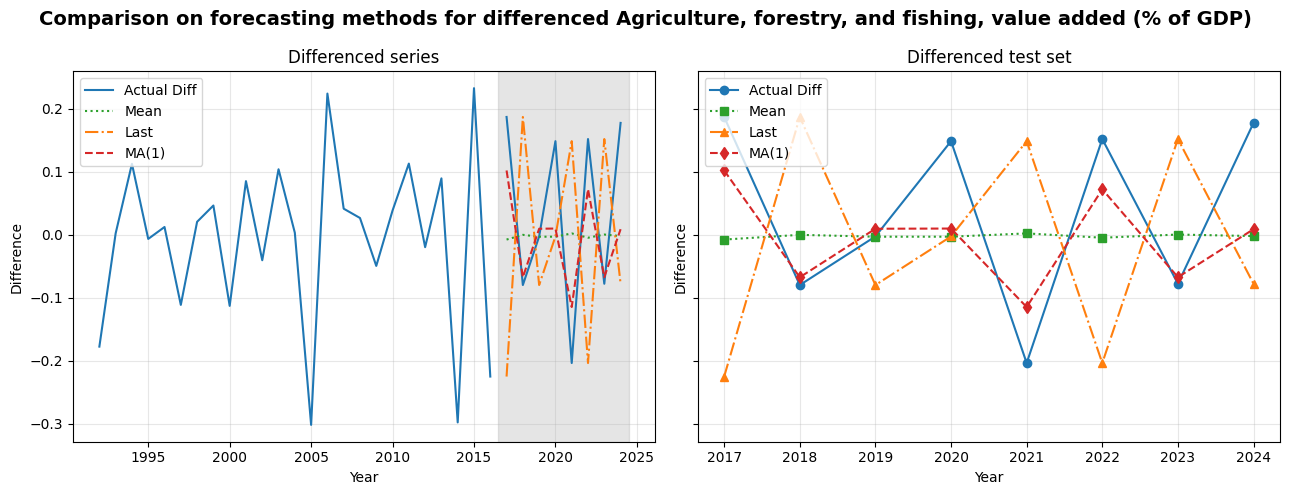


=== Year alignment check ===
test_results Years: [2017, 2018, 2019, 2020, 2021]  ...  [2022, 2023, 2024]
test_original Years: [2018, 2019, 2020, 2021, 2022]  ...  [2022, 2023, 2024]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 0.18665321 -0.08015669 -0.0030108   0.14823473 -0.2039707 ]
reconstructed: [18937539.18665321 18933008.29314973 18928477.39663545 18923946.6483559
 18919415.69610565]
actual test_original first k values: [1.85755613 1.8186688  1.9280162  1.83339291 1.89037175]
last obs: [np.float64(1.8934326477664287)]


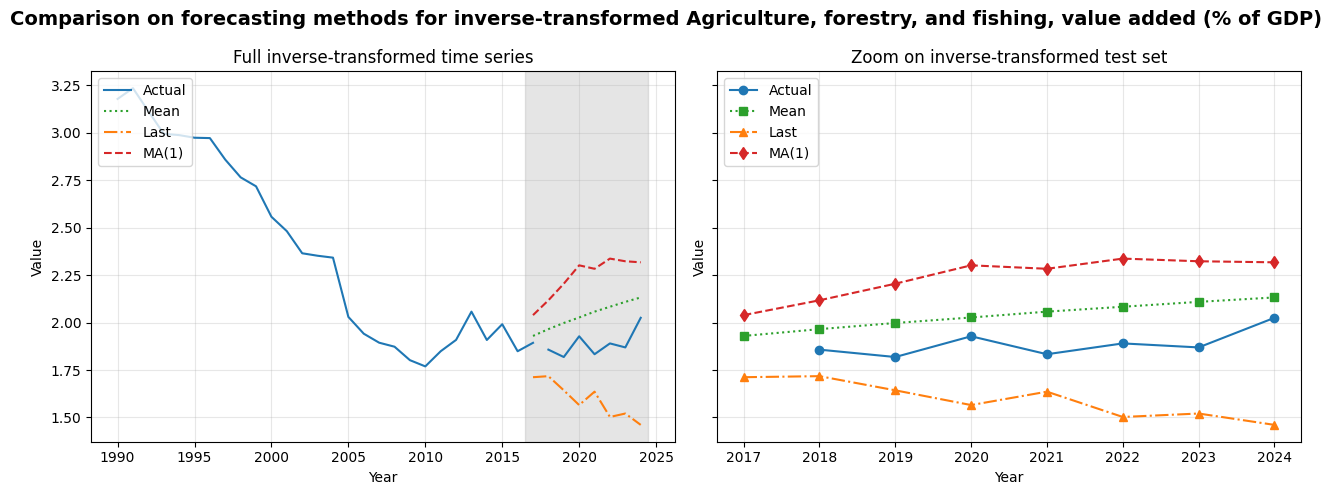


Indicator: Agriculture, forestry, and fishing, value added (current US$)
ADF Statistic: -2.1025
p-value: 0.2435
Differenziazione n.1: ADF = -5.3026, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 28, Test: 7
Diff data - Train: 28, 
    Year         Value          Diff
0  1990  3.763327e+10           NaN
1  1991  4.041296e+10  2.779693e+09
2  1992  4.120790e+10  7.949339e+08
3  1993  3.196952e+10 -9.238378e+09
4  1994  3.292128e+10  9.517599e+08, 
 Test: 7, 
     Year         Value          Diff
28  2018  3.899819e+10  1.683915e+09
29  2019  3.672996e+10 -2.268230e+09
30  2020  3.677654e+10  4.658587e+07
31  2021  3.995344e+10  3.176896e+09
32  2022  3.977470e+10 -1.787407e+08


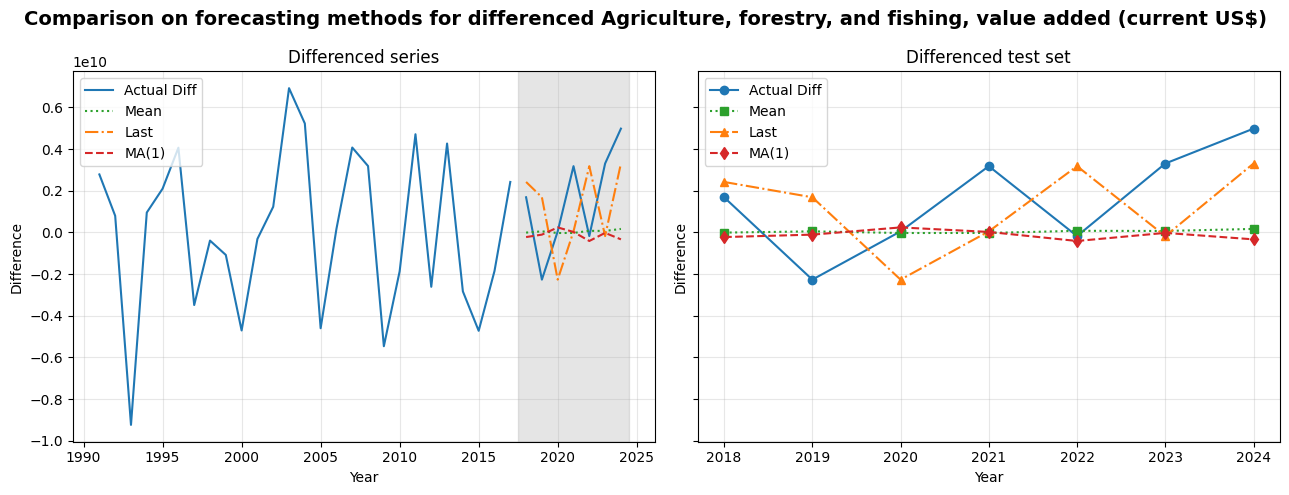


=== Year alignment check ===
test_results Years: [2018, 2019, 2020, 2021, 2022]  ...  [2022, 2023, 2024]
test_original Years: [2018, 2019, 2020, 2021, 2022]  ...  [2022, 2023, 2024]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 1.68391539e+09 -2.26822973e+09  4.65858689e+07  3.17689623e+09
 -1.78740660e+08]
reconstructed: [1.68391539e+09 1.09960106e+09 5.61872588e+08 3.20104036e+09
 5.66146746e+09]
actual test_original first k values: [3.89981884e+10 3.67299587e+10 3.67765445e+10 3.99534408e+10
 3.97747001e+10]
last obs: [np.float64(37314273003.76478)]


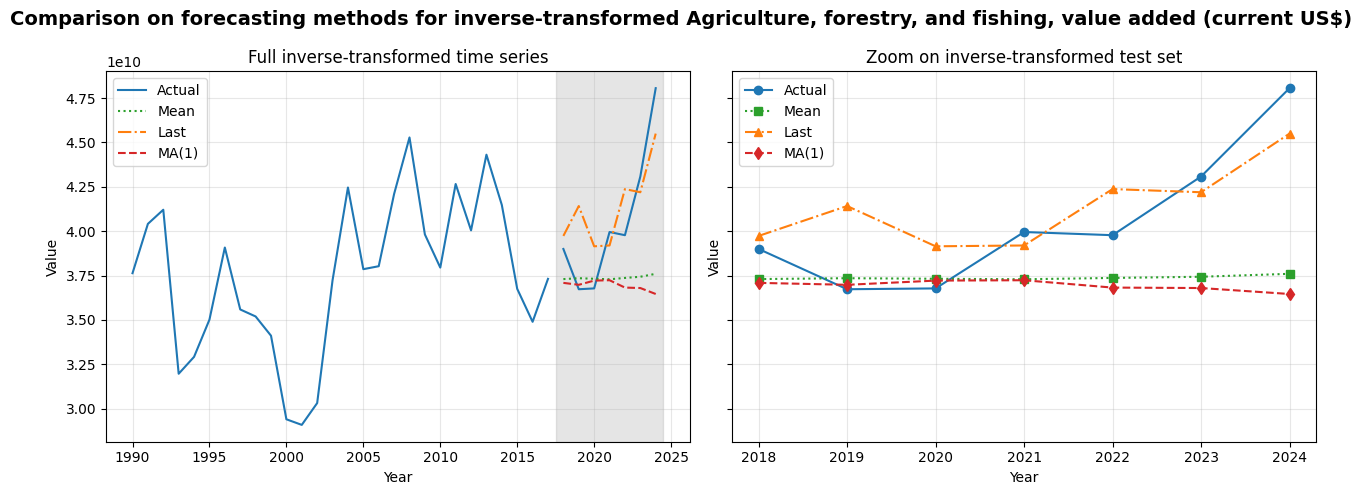


Indicator: Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)
ADF Statistic: -2.0918
p-value: 0.2478
Differenziazione n.1: ADF = -9.3390, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 41, Test: 11
Diff data - Train: 41, 
    Year      Value      Diff
0  1970  61.538462       NaN
1  1971  60.354920 -1.183542
2  1972  59.201104 -1.153816
3  1973  58.075908 -1.125196
4  1974  56.978280 -1.097628, 
 Test: 11, 
     Year      Value      Diff
41  2011  45.952290  1.867145
42  2012  47.807045  1.854755
43  2013  49.707602  1.900557
44  2014  49.716325  0.008722
45  2015  49.725050  0.008725


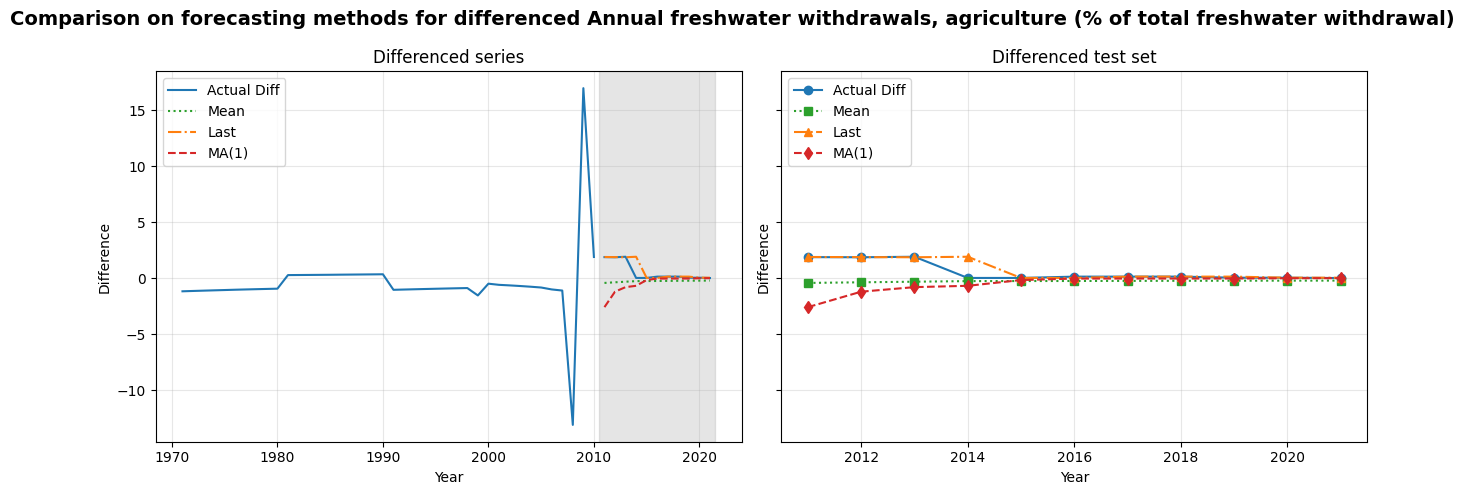


=== Year alignment check ===
test_results Years: [2011, 2012, 2013, 2014, 2015]  ...  [2019, 2020, 2021]
test_original Years: [2011, 2012, 2013, 2014, 2015]  ...  [2019, 2020, 2021]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [1.86714491 1.85475473 1.90055711 0.00872216 0.00872522]
reconstructed: [3.7314273e+10 3.7314273e+10 3.7314273e+10 3.7314273e+10 3.7314273e+10]
actual test_original first k values: [45.95229049 47.80704523 49.70760234 49.7163245  49.72504972]
last obs: [np.float64(44.0851455852)]


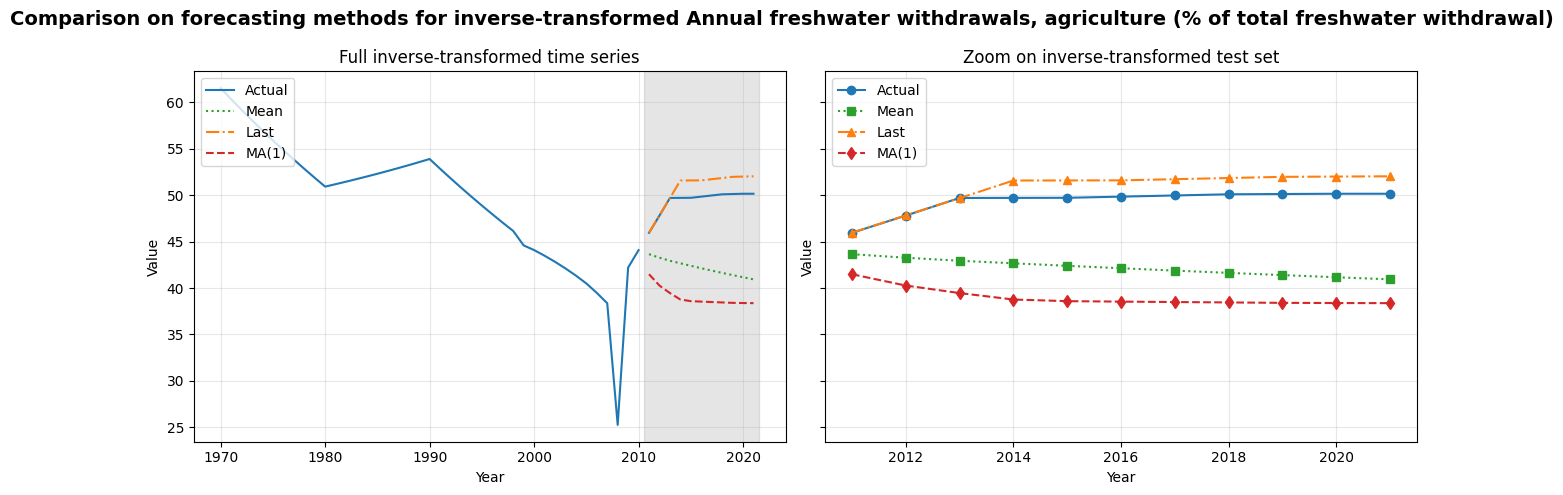


Indicator: Cereal yield (kg per hectare)
ADF Statistic: -1.9385
p-value: 0.3142
Differenziazione n.1: ADF = -10.5822, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year   Value   Diff
0  1961  2181.5    NaN
1  1962  2225.3   43.8
2  1963  2115.2 -110.1
3  1964  2243.0  127.8
4  1965  2399.3  156.3, 
 Test: 13, 
     Year   Value   Diff
49  2010  5322.5  235.6
50  2011  5677.2  354.7
51  2012  5315.1 -362.1
52  2013  5264.6  -50.5
53  2014  5717.5  452.9


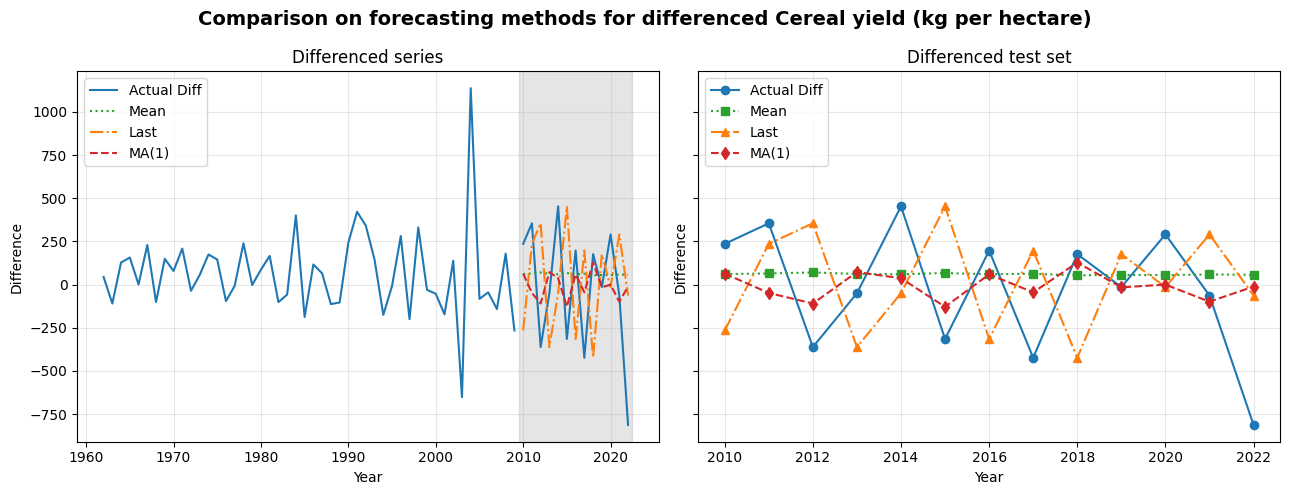


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 235.6  354.7 -362.1  -50.5  452.9]
reconstructed: [279.68514559 634.38514559 272.28514559 221.78514559 674.68514559]
actual test_original first k values: [5322.5 5677.2 5315.1 5264.6 5717.5]
last obs: [np.float64(5086.9)]


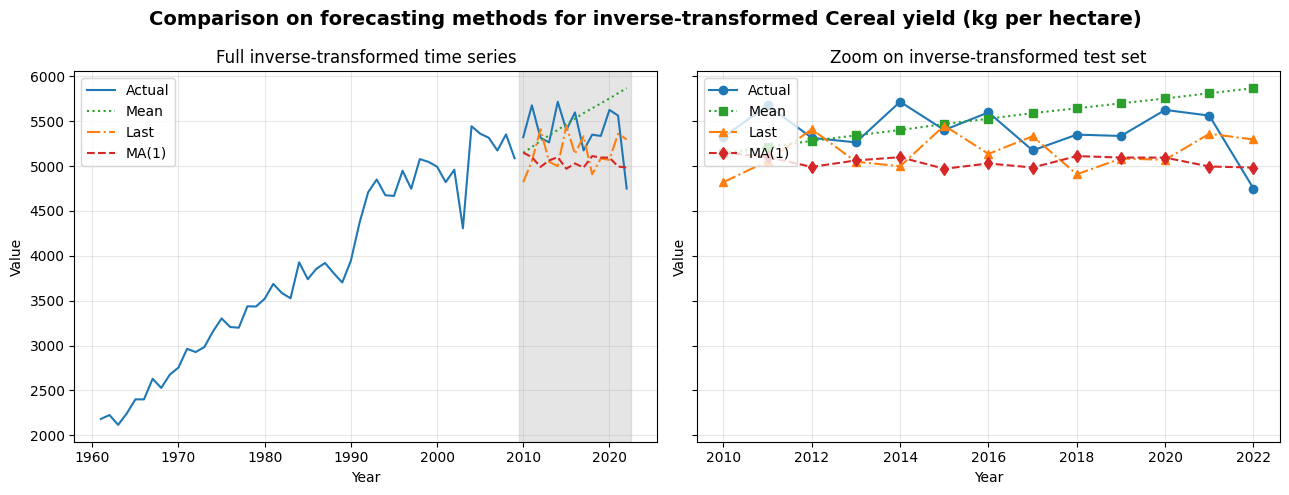


Indicator: Livestock production index (2014-2016 = 100)
ADF Statistic: -2.7642
p-value: 0.0636
Differenziazione n.1: ADF = -4.0456, p-value = 0.0012
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year  Value  Diff
0  1961  70.91   NaN
1  1962  72.59  1.68
2  1963  65.95 -6.64
3  1964  69.57  3.62
4  1965  72.80  3.23, 
 Test: 13, 
     Year   Value  Diff
49  2010  109.48 -1.36
50  2011  106.50 -2.98
51  2012  108.77  2.27
52  2013  103.92 -4.85
53  2014   96.02 -7.90


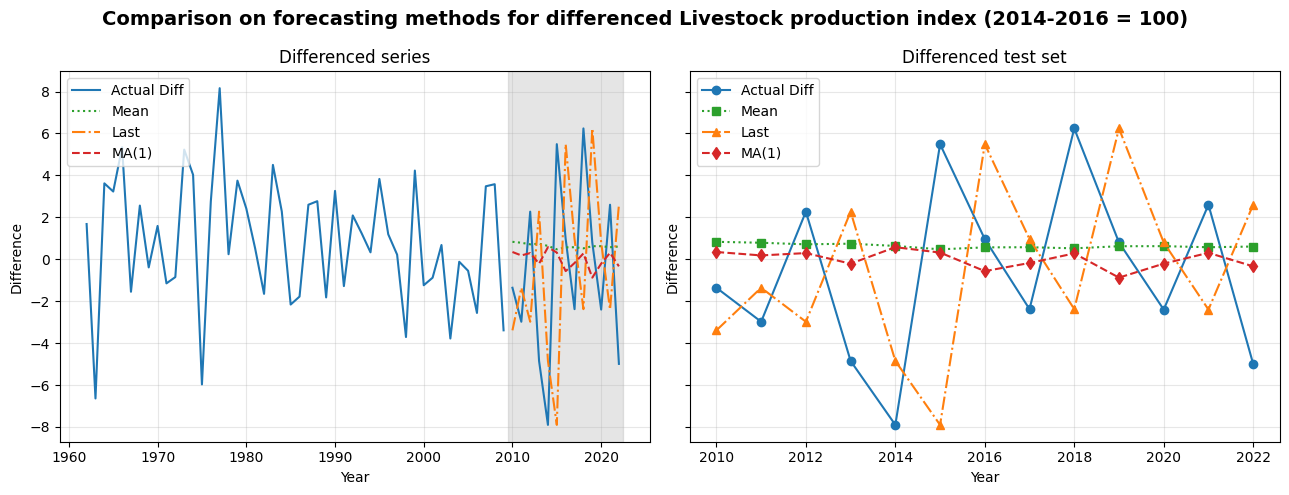


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [-1.36 -2.98  2.27 -4.85 -7.9 ]
reconstructed: [5085.54 5082.56 5084.83 5079.98 5072.08]
actual test_original first k values: [109.48 106.5  108.77 103.92  96.02]
last obs: [np.float64(110.84)]


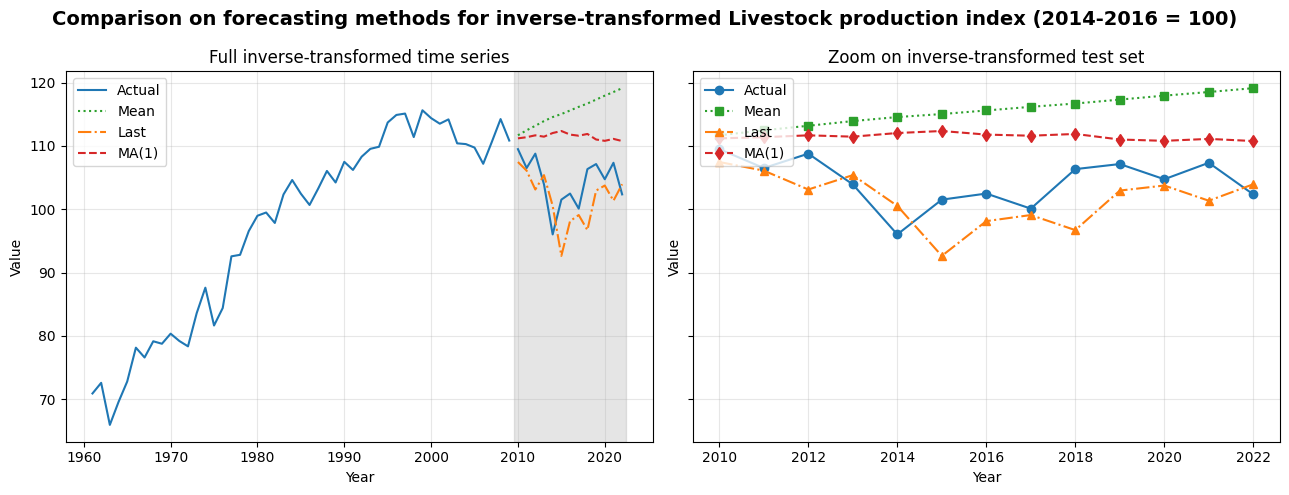


Indicator: Food production index (2014-2016 = 100)
ADF Statistic: -2.4827
p-value: 0.1198
Differenziazione n.1: ADF = -6.4485, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year  Value  Diff
0  1961  85.93   NaN
1  1962  86.90  0.97
2  1963  86.37 -0.53
3  1964  90.28  3.91
4  1965  92.75  2.47, 
 Test: 13, 
     Year   Value  Diff
49  2010  108.51 -3.51
50  2011  107.71 -0.80
51  2012  103.35 -4.36
52  2013  101.77 -1.58
53  2014   95.58 -6.19


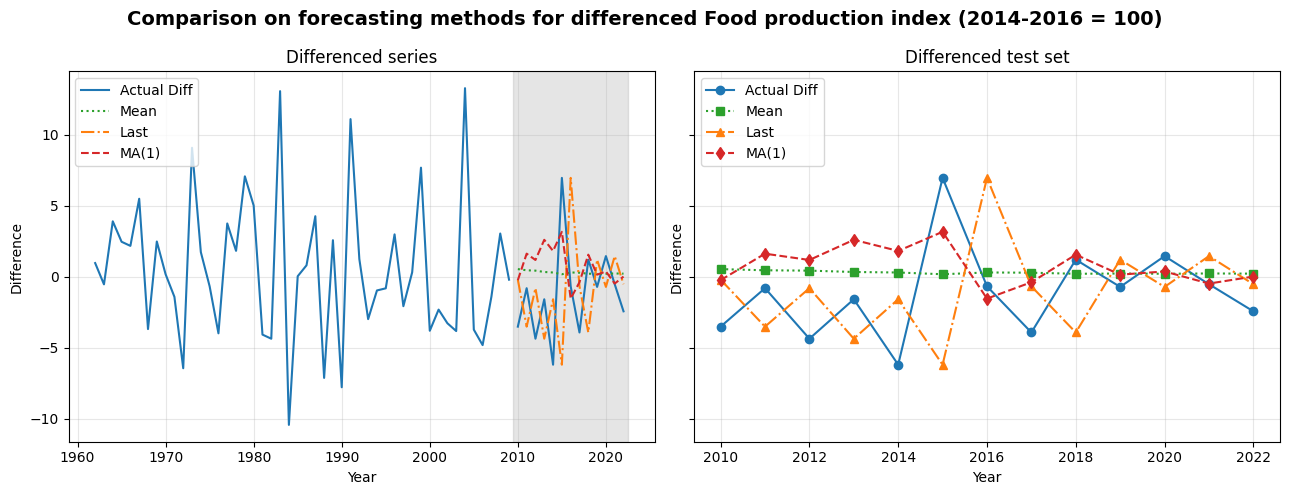


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [-3.51 -0.8  -4.36 -1.58 -6.19]
reconstructed: [107.33 106.53 102.17 100.59  94.4 ]
actual test_original first k values: [108.51 107.71 103.35 101.77  95.58]
last obs: [np.float64(112.02)]


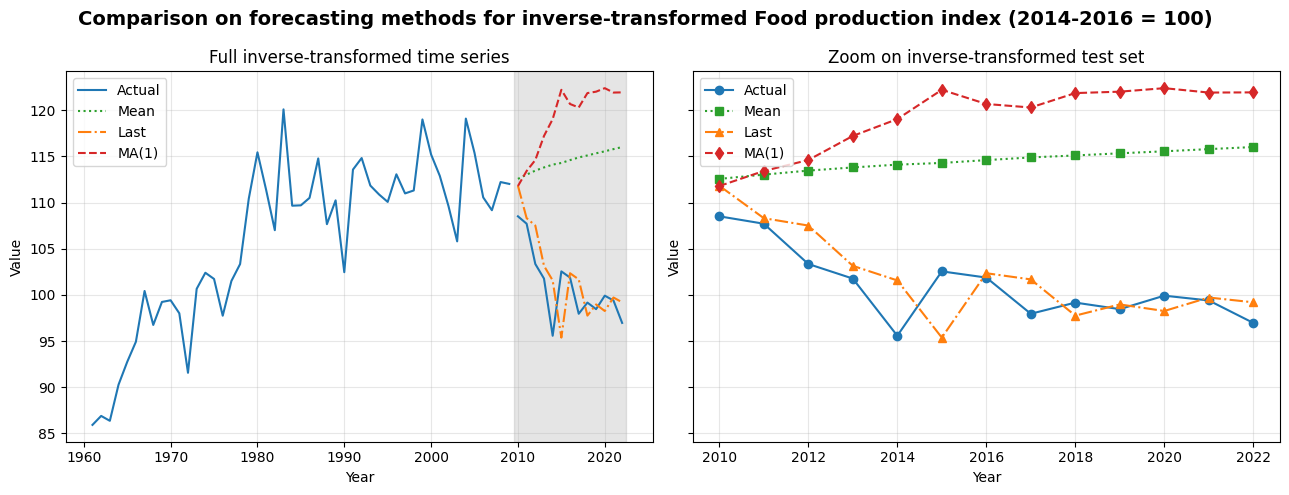


Indicator: Crop production index (2014-2016 = 100)
ADF Statistic: -1.2687
p-value: 0.6434
Differenziazione n.1: ADF = -7.2662, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year   Value  Diff
0  1961   93.68   NaN
1  1962   94.43  0.75
2  1963   97.19  2.76
3  1964  101.31  4.12
4  1965  103.32  2.01, 
 Test: 13, 
     Year   Value  Diff
49  2010  108.31 -4.66
50  2011  108.45  0.14
51  2012  100.58 -7.87
52  2013  100.67  0.09
53  2014   95.40 -5.27


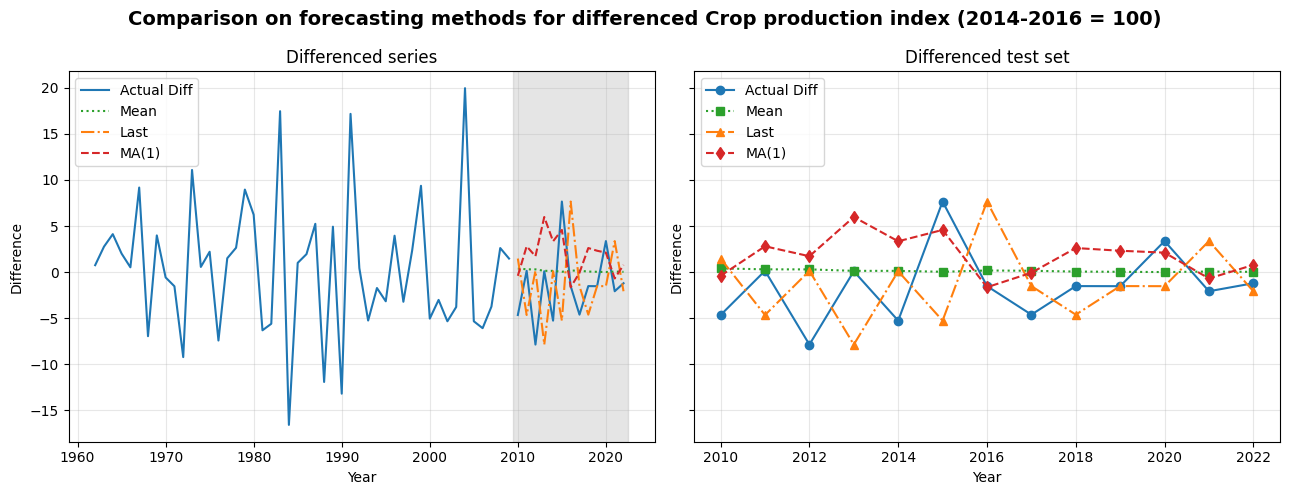


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [-4.66  0.14 -7.87  0.09 -5.27]
reconstructed: [107.36 107.5   99.63  99.72  94.45]
actual test_original first k values: [108.31 108.45 100.58 100.67  95.4 ]
last obs: [np.float64(112.97)]


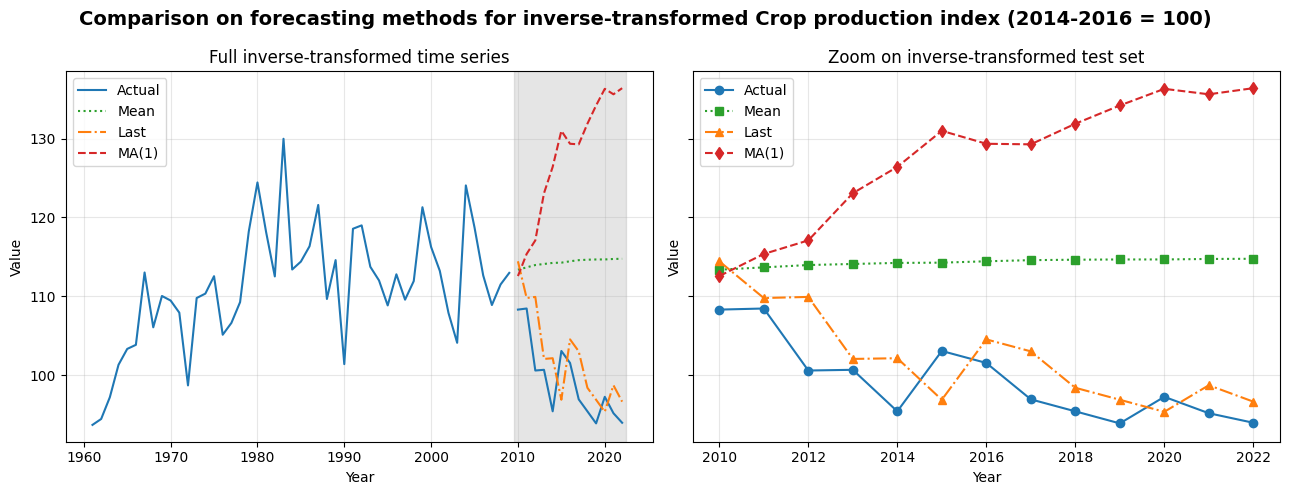


Indicator: Cereal production (metric tons)
ADF Statistic: -1.7578
p-value: 0.4016
Differenziazione n.1: ADF = -8.3101, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year       Value       Diff
0  1961  13933400.0        NaN
1  1962  14433210.0   499810.0
2  1963  13324660.0 -1108550.0
3  1964  14007520.0   682860.0
4  1965  14531270.0   523750.0, 
 Test: 13, 
     Year       Value       Diff
49  2010  18502904.0   797158.0
50  2011  19521138.3  1018234.3
51  2012  18594125.5  -927012.8
52  2013  18214664.0  -379461.5
53  2014  19396843.8  1182179.8


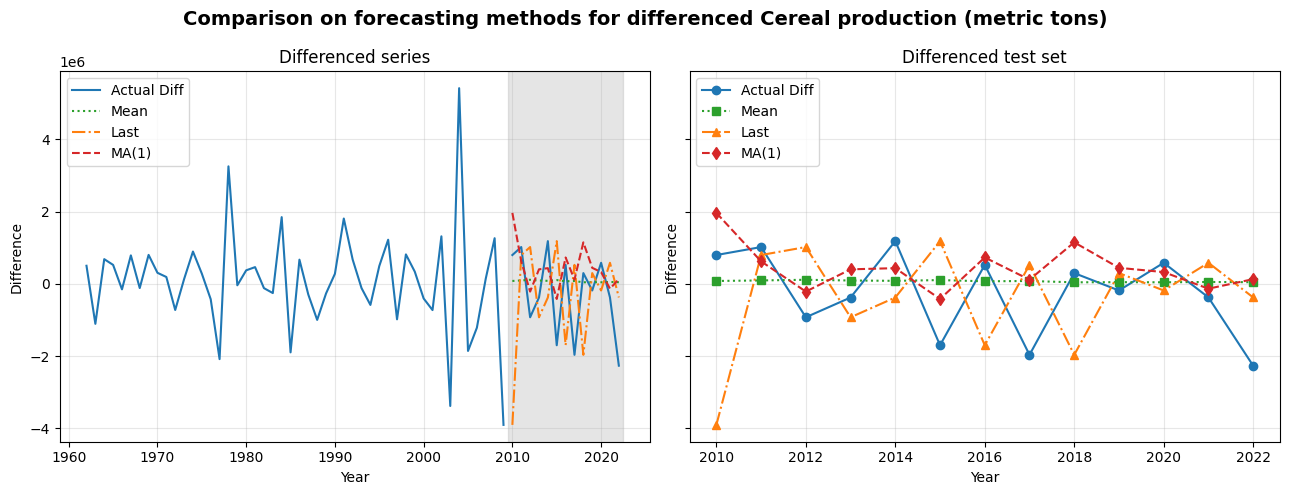


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 797158.  1018234.3 -927012.8 -379461.5 1182179.8]
reconstructed: [ 797270.97 1815505.27  888492.47  509030.97 1691210.77]
actual test_original first k values: [18502904.  19521138.3 18594125.5 18214664.  19396843.8]
last obs: [np.float64(17705746.0)]


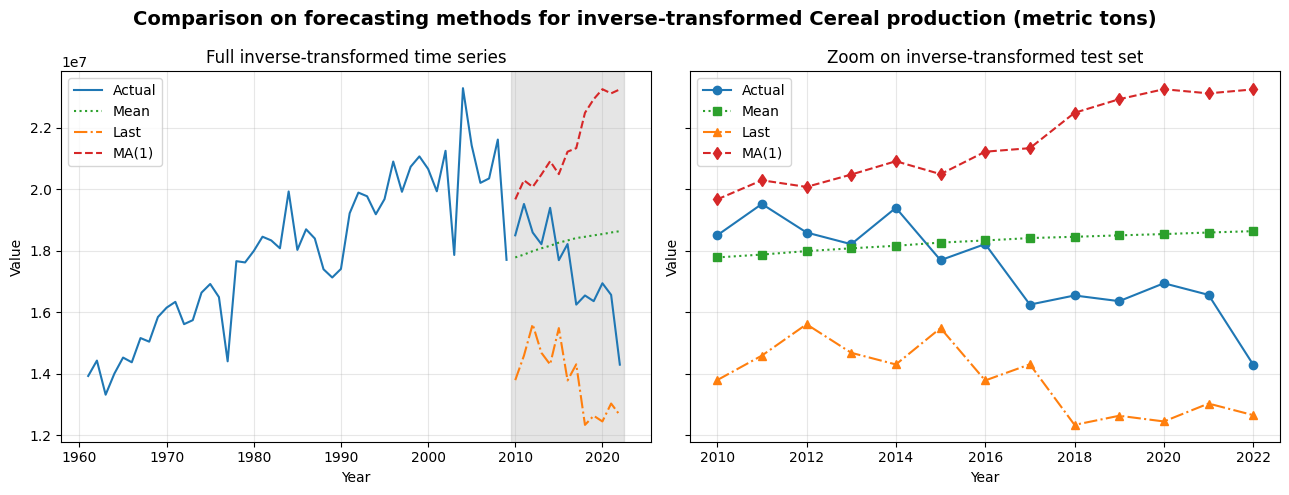


Indicator: Permanent cropland (% of land area)
ADF Statistic: -0.7408
p-value: 0.8359
Differenziazione n.1: ADF = -5.0807, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year     Value      Diff
0  1961  9.336643       NaN
1  1962  9.435245  0.098603
2  1963  9.319642 -0.115603
3  1964  9.438645  0.119003
4  1965  9.445446  0.006800, 
 Test: 13, 
     Year     Value      Diff
49  2010  8.750905  0.031787
50  2011  8.523661 -0.227244
51  2012  8.257867 -0.265794
52  2013  7.642416 -0.615451
53  2014  8.092169  0.449753


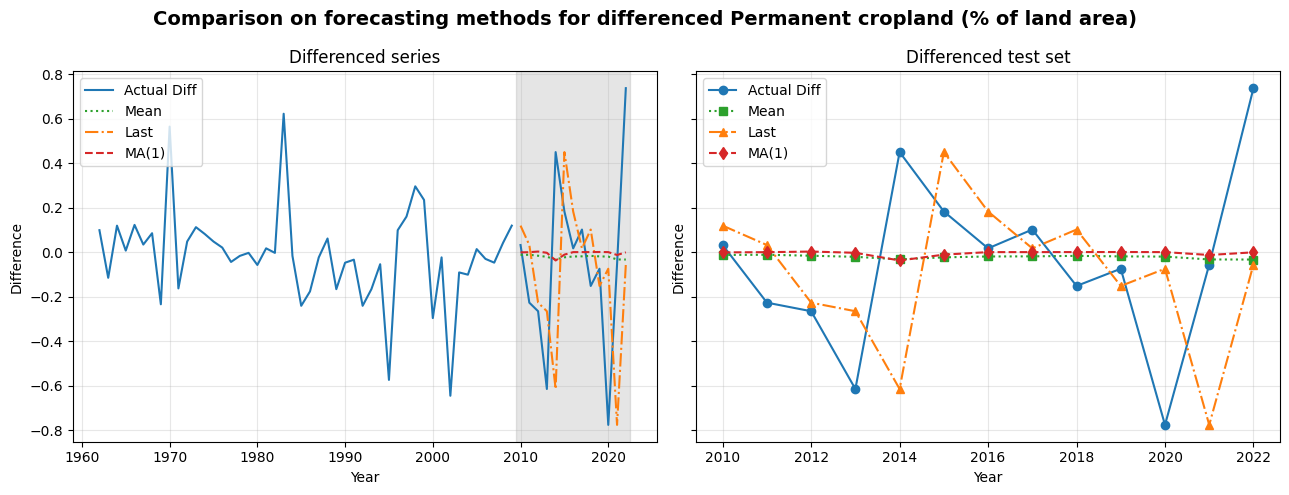


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 0.03178704 -0.22724352 -0.26579376 -0.61545121  0.44975281]
reconstructed: [17705746.03178704 17705745.80454352 17705745.53874975 17705744.92329855
 17705745.37305135]
actual test_original first k values: [8.75090458 8.52366106 8.25786729 7.64241609 8.09216889]
last obs: [np.float64(8.719117537654117)]


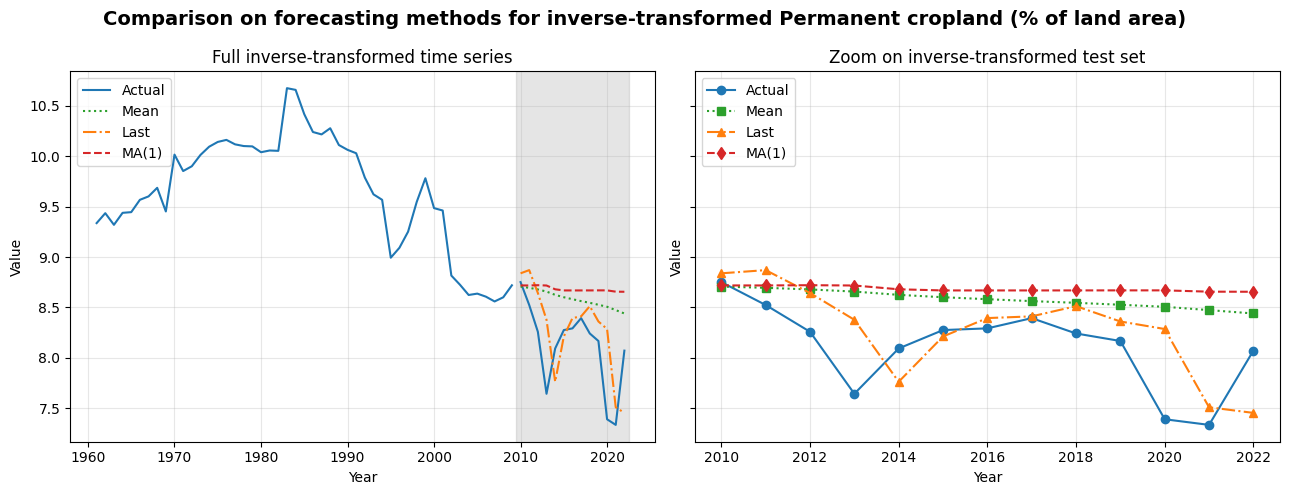


Indicator: Land under cereal production (hectares)
ADF Statistic: -1.3744
p-value: 0.5945
Differenziazione n.1: ADF = -10.8306, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year      Value      Diff
0  1961  6387203.0       NaN
1  1962  6485855.0   98652.0
2  1963  6299467.0 -186388.0
3  1964  6244904.0  -54563.0
4  1965  6056518.0 -188386.0, 
 Test: 13, 
     Year      Value     Diff
49  2010  3476388.0  -4267.0
50  2011  3438491.0 -37897.0
51  2012  3498385.0  59894.0
52  2013  3459869.0 -38516.0
53  2014  3392536.0 -67333.0


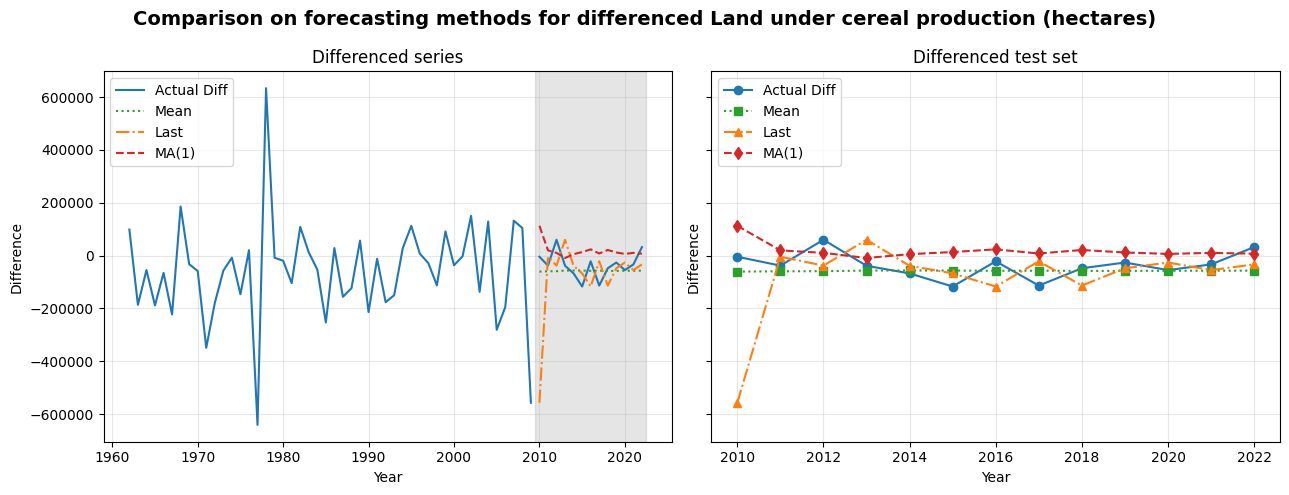


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ -4267. -37897.  59894. -38516. -67333.]
reconstructed: [ -4258.28088246 -42155.28088246  17738.71911754 -20777.28088246
 -88110.28088246]
actual test_original first k values: [3476388. 3438491. 3498385. 3459869. 3392536.]
last obs: [np.float64(3480655.0)]


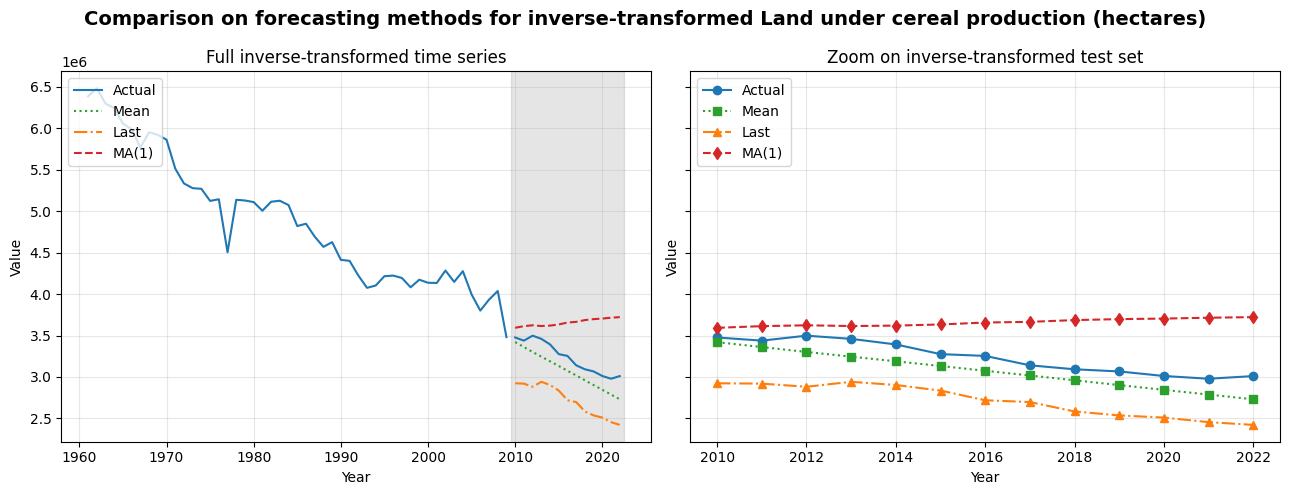


Indicator: Arable land (% of land area)
ADF Statistic: -2.0241
p-value: 0.2761
Differenziazione n.1: ADF = -7.3582, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year      Value      Diff
0  1961  43.731937       NaN
1  1962  43.504131 -0.227806
2  1963  43.092720 -0.411411
3  1964  42.834314 -0.258407
4  1965  42.582707 -0.251607, 
 Test: 13, 
     Year      Value      Diff
49  2010  23.813227  0.206278
50  2011  22.724352 -1.088875
51  2012  24.070229  1.345877
52  2013  23.086183 -0.984046
53  2014  22.751405 -0.334778


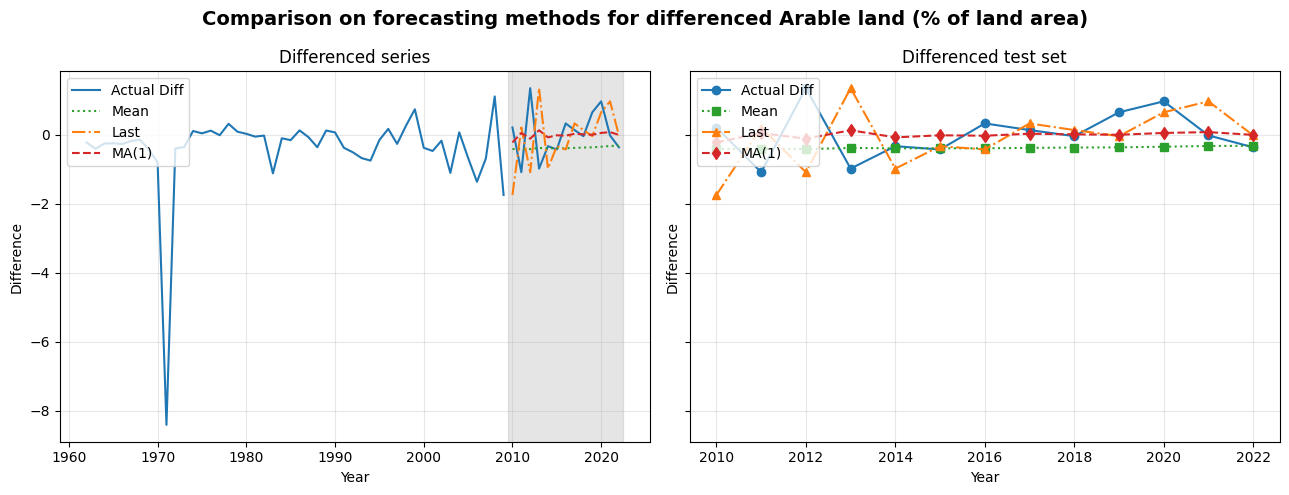


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 0.2062776  -1.08887521  1.34587682 -0.98404561 -0.3347784 ]
reconstructed: [3480655.2062776  3480654.11740239 3480655.46327921 3480654.47923359
 3480654.14445519]
actual test_original first k values: [23.81322747 22.72435225 24.07022907 23.08618346 22.75140505]
last obs: [np.float64(23.606949864397837)]


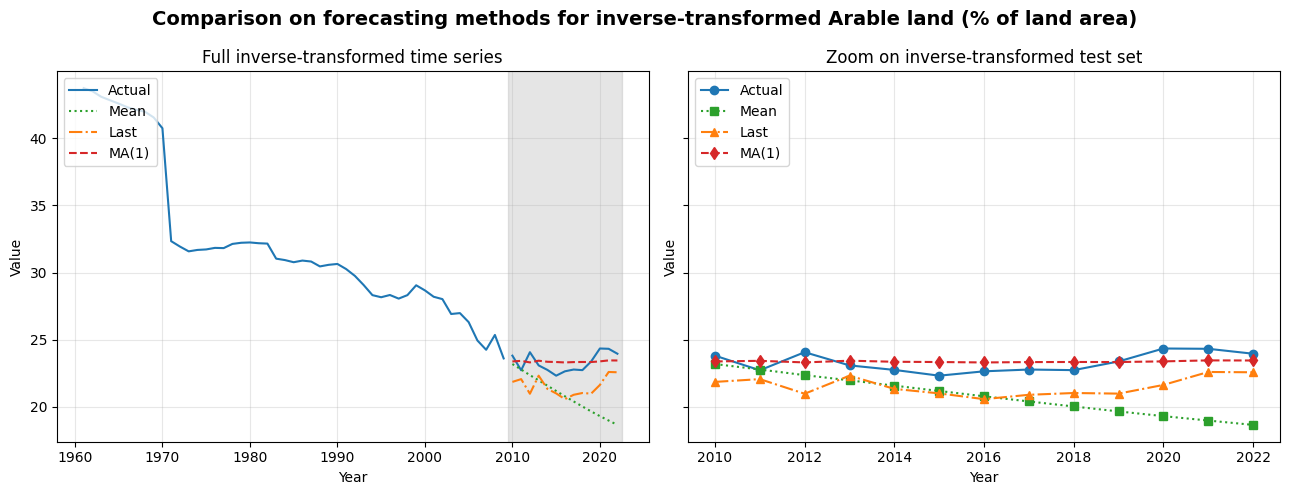


Indicator: Arable land (hectares per person)
ADF Statistic: -2.5940
p-value: 0.0942
Differenziazione n.1: ADF = -4.4399, p-value = 0.0003
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 48, Test: 13
Diff data - Train: 48, 
    Year     Value      Diff
0  1961  0.254510       NaN
1  1962  0.251477 -0.003033
2  1963  0.247288 -0.004189
3  1964  0.243791 -0.003497
4  1965  0.240327 -0.003464, 
 Test: 13, 
     Year     Value      Diff
48  2009  0.117218 -0.009413
49  2010  0.117721  0.000503
50  2011  0.111950 -0.005771
51  2012  0.118256  0.006306
52  2013  0.113195 -0.005061


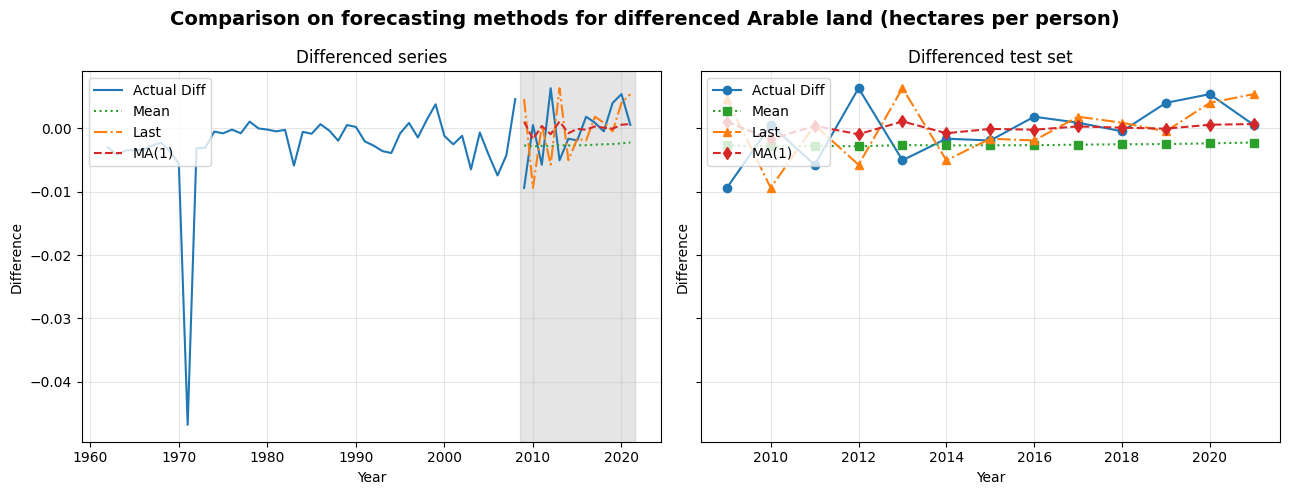


=== Year alignment check ===
test_results Years: [2009, 2010, 2011, 2012, 2013]  ...  [2019, 2020, 2021]
test_original Years: [2009, 2010, 2011, 2012, 2013]  ...  [2019, 2020, 2021]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [-0.00941301  0.00050251 -0.00577107  0.00630648 -0.00506095]
reconstructed: [23.59753686 23.59803937 23.59226829 23.59857477 23.59351382]
actual test_original first k values: [0.11721848 0.11772099 0.11194992 0.1182564  0.11319545]
last obs: [np.float64(0.12663148873858807)]


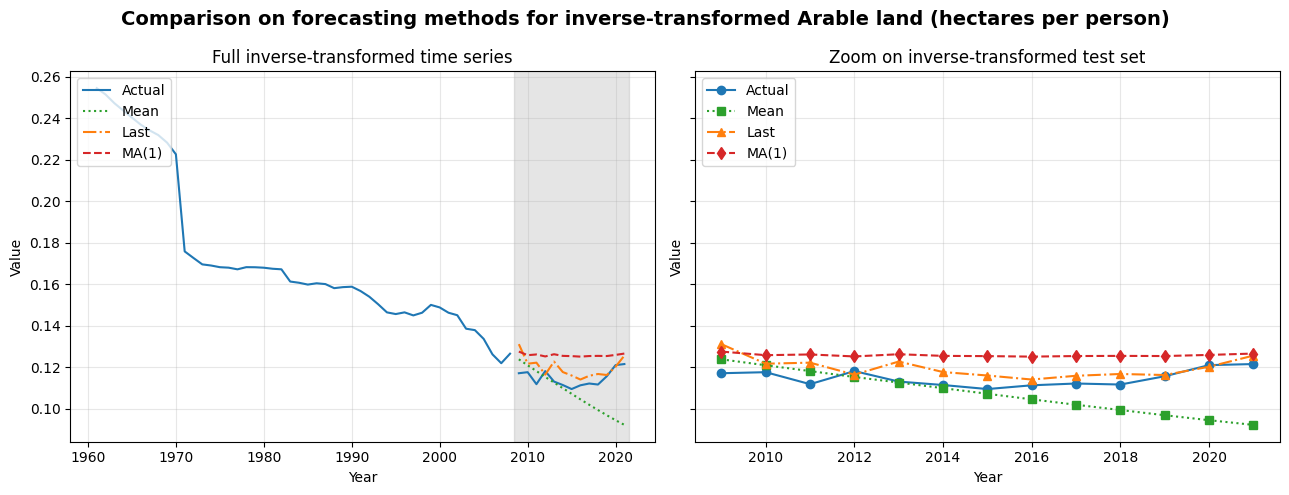


Indicator: Arable land (hectares)
ADF Statistic: -2.0418
p-value: 0.2686
Differenziazione n.1: ADF = -7.2816, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 48, Test: 13
Diff data - Train: 48, 
    Year       Value      Diff
0  1961  12862000.0       NaN
1  1962  12795000.0  -67000.0
2  1963  12674000.0 -121000.0
3  1964  12598000.0  -76000.0
4  1965  12524000.0  -74000.0, 
 Test: 13, 
     Year      Value      Diff
48  2009  6981000.0 -517000.0
49  2010  7042000.0   61000.0
50  2011  6720000.0 -322000.0
51  2012  7118000.0  398000.0
52  2013  6827000.0 -291000.0


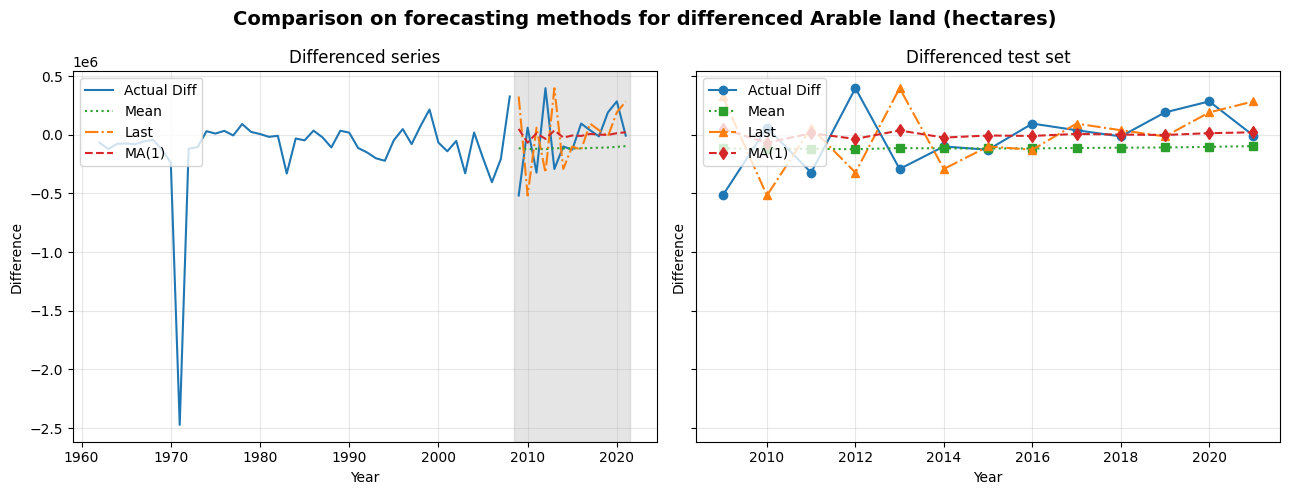


=== Year alignment check ===
test_results Years: [2009, 2010, 2011, 2012, 2013]  ...  [2019, 2020, 2021]
test_original Years: [2009, 2010, 2011, 2012, 2013]  ...  [2019, 2020, 2021]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [-517000.   61000. -322000.  398000. -291000.]
reconstructed: [-516999.87336851 -455999.87336851 -777999.87336851 -379999.87336851
 -670999.87336851]
actual test_original first k values: [6981000. 7042000. 6720000. 7118000. 6827000.]
last obs: [np.float64(7498000.0)]


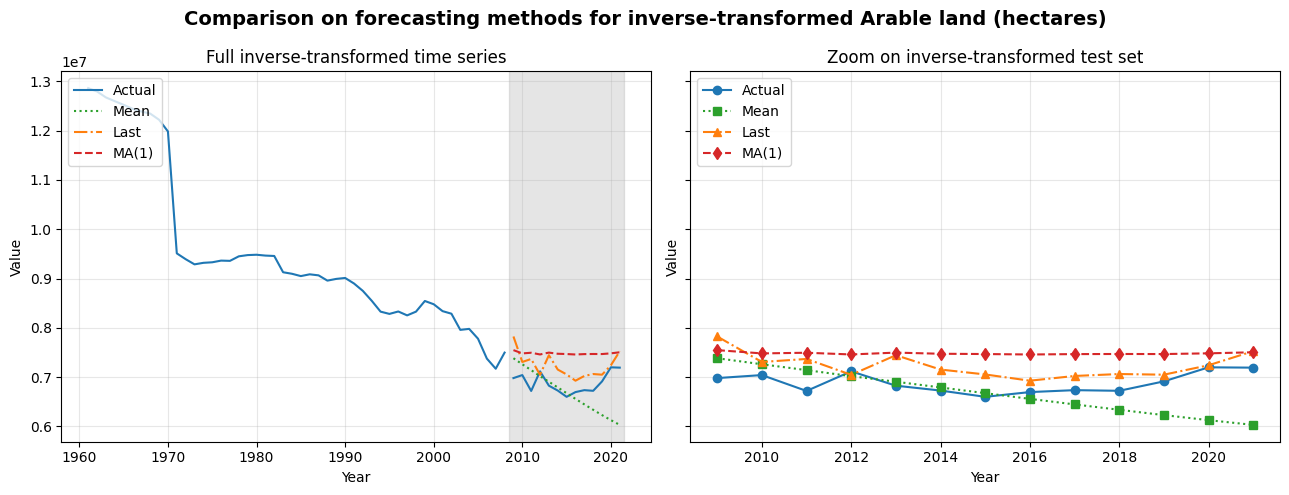


Indicator: Agricultural land (% of land area)
ADF Statistic: -1.2346
p-value: 0.6585
Differenziazione n.1: ADF = -8.4019, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year      Value      Diff
0  1961  70.324028       NaN
1  1962  70.218626 -0.105403
2  1963  69.735813 -0.482813
3  1964  69.572609 -0.163204
4  1965  69.497807 -0.074802, 
 Test: 13, 
     Year      Value      Diff
49  2010  48.450889  1.168005
50  2011  46.843953 -1.606936
51  2012  46.425987 -0.417966
52  2013  46.091209 -0.334778
53  2014  44.508620 -1.582589


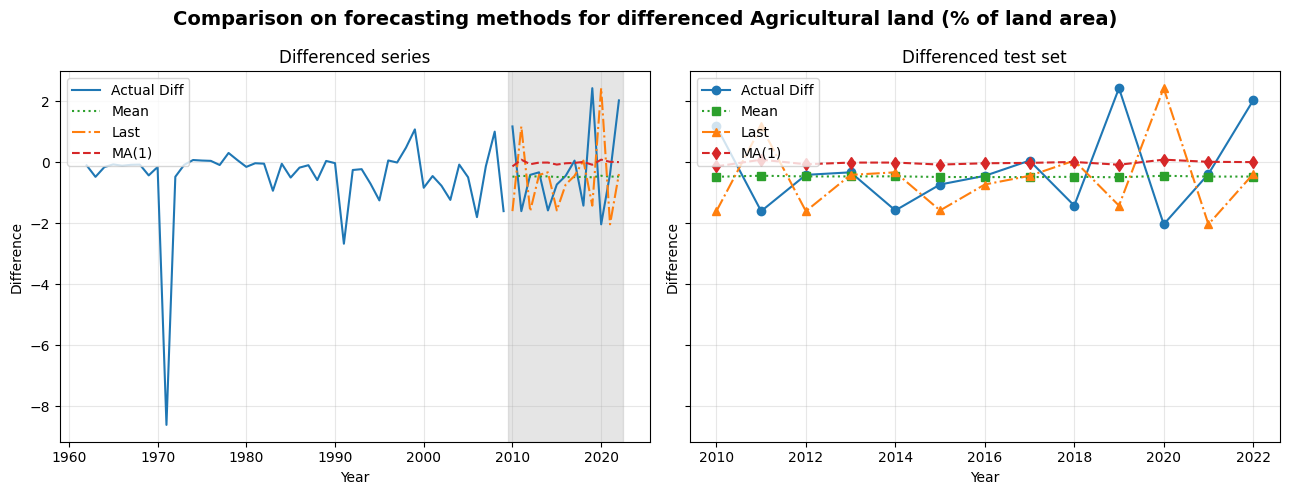


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 1.16800465 -1.60693634 -0.41796576 -0.3347784  -1.58258882]
reconstructed: [7498001.16800465 7497999.56106832 7497999.14310255 7497998.80832415
 7497997.22573533]
actual test_original first k values: [48.45088902 46.84395268 46.42598692 46.09120852 44.5086197 ]
last obs: [np.float64(47.28288436956831)]


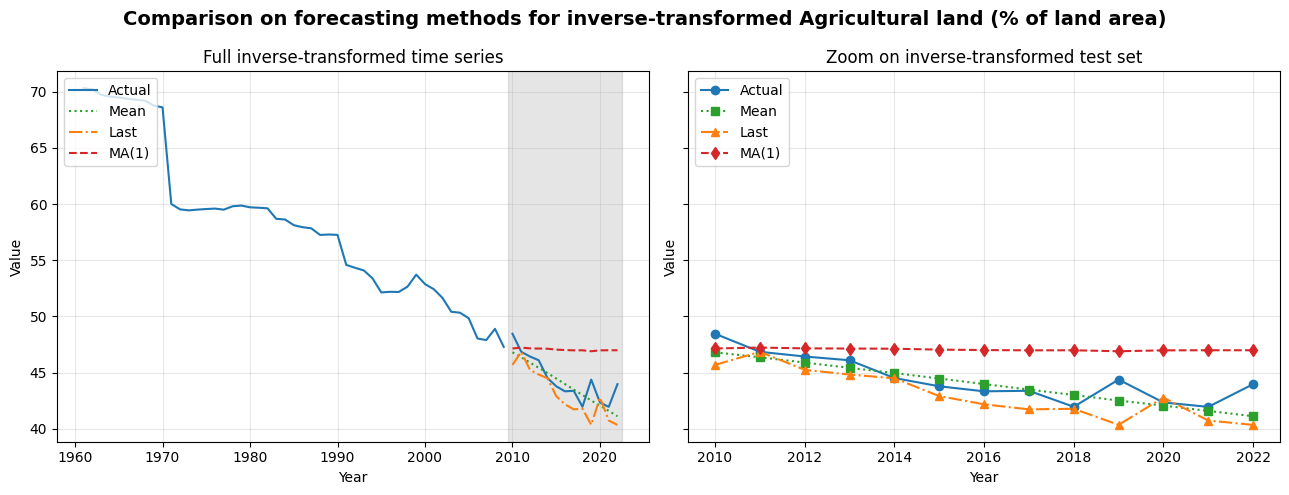


Indicator: Agricultural land (sq. km)
ADF Statistic: -0.8888
p-value: 0.7916
Differenziazione n.1: ADF = -8.5663, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 48, Test: 13
Diff data - Train: 48, 
    Year     Value    Diff
0  1961  206830.0     NaN
1  1962  206520.0  -310.0
2  1963  205100.0 -1420.0
3  1964  204620.0  -480.0
4  1965  204400.0  -220.0, 
 Test: 13, 
     Year     Value    Diff
48  2009  139824.0 -4748.0
49  2010  143278.0  3454.0
50  2011  138526.0 -4752.0
51  2012  137290.0 -1236.0
52  2013  136300.0  -990.0


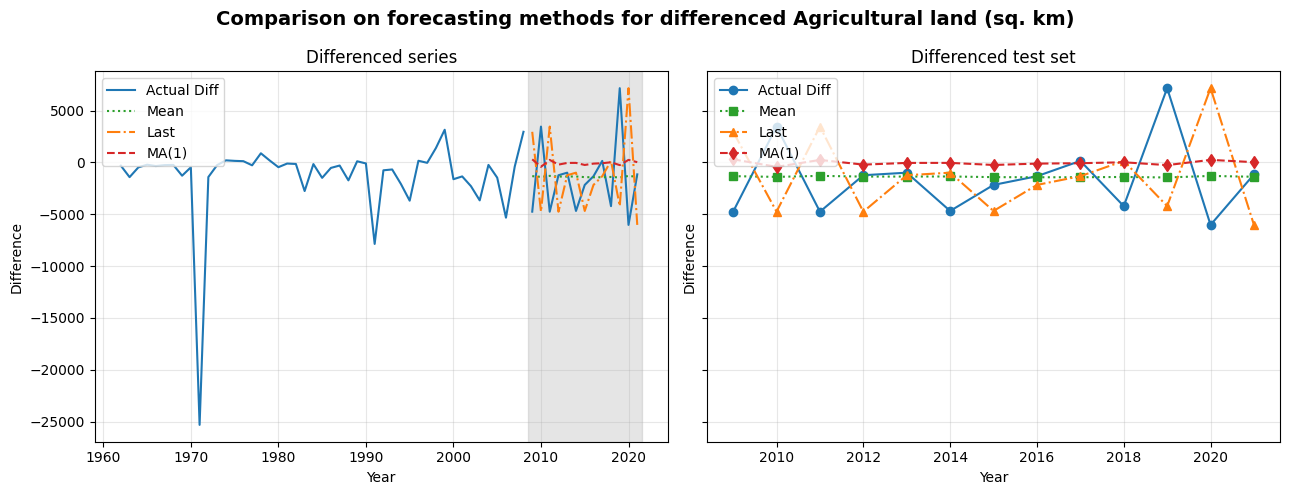


=== Year alignment check ===
test_results Years: [2009, 2010, 2011, 2012, 2013]  ...  [2019, 2020, 2021]
test_original Years: [2009, 2010, 2011, 2012, 2013]  ...  [2019, 2020, 2021]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [-4748.  3454. -4752. -1236.  -990.]
reconstructed: [-4700.71711563 -1246.71711563 -5998.71711563 -7234.71711563
 -8224.71711563]
actual test_original first k values: [139824. 143278. 138526. 137290. 136300.]
last obs: [np.float64(144572.0)]


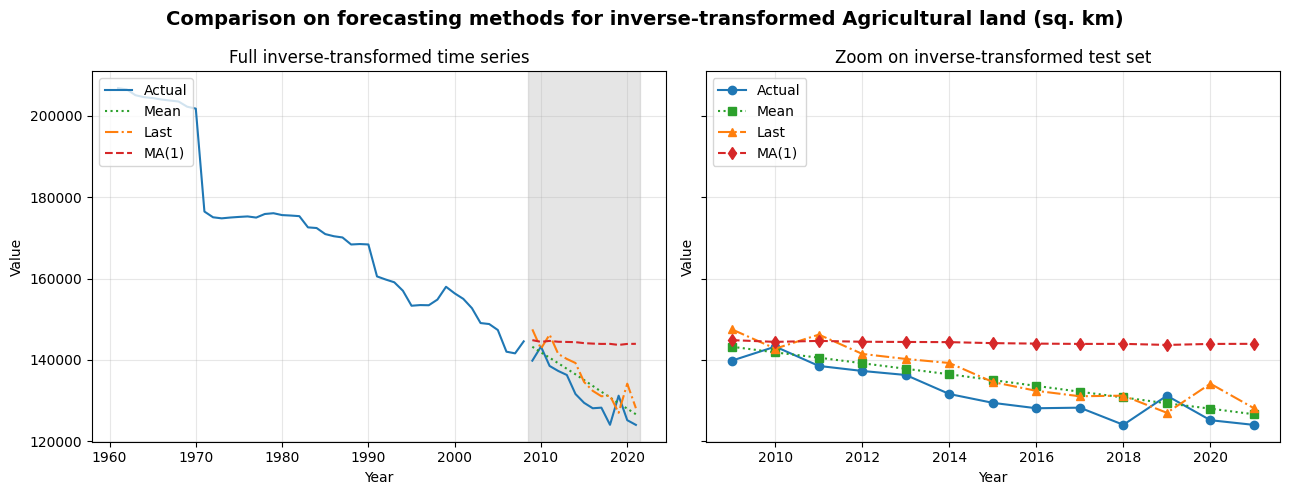


Indicator: Fertilizer consumption (kilograms per hectare of arable land)
ADF Statistic: -2.4464
p-value: 0.1291
Differenziazione n.1: ADF = -1.1675, p-value = 0.6874
Differenziazione n.2: ADF = -5.6761, p-value = 0.0000
Serie stazionaria dopo 2 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 48, 
    Year      Value      Diff
0  1961  67.795055       NaN
1  1962  69.362485       NaN
2  1963  68.764636 -2.165279
3  1964  74.639625  6.472838
4  1965  86.395481  5.880866, 
 Test: 14, 
     Year       Value       Diff
48  2009  120.111589  23.389022
49  2010  122.745953  25.999036
50  2011  134.322470   8.942153
51  2012  122.506322 -23.392666
52  2013  129.303501  18.613327


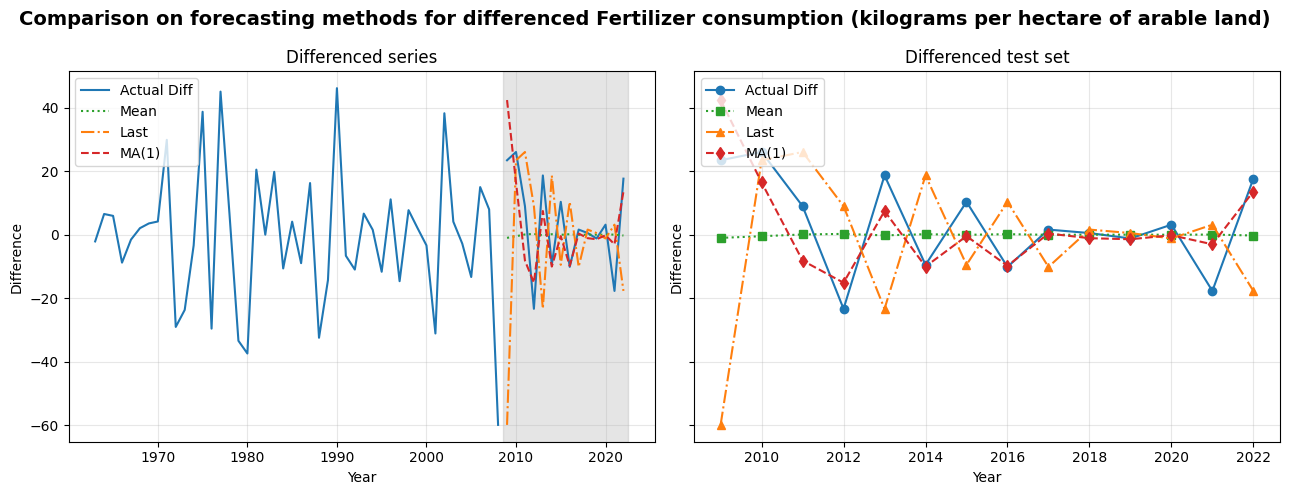


=== Year alignment check ===
test_results Years: [2009, 2010, 2011, 2012, 2013]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 23.38902191  25.999036     8.94215313 -23.39266562  18.61332704]
reconstructed: [144595.38902191 144621.3880579  144630.33021103 144606.93754541
 144625.55087245]
actual test_original first k values: [122.74595285 134.32247024 122.506322   129.30350081 126.56406064]
last obs: [np.float64(120.11158859762212)]


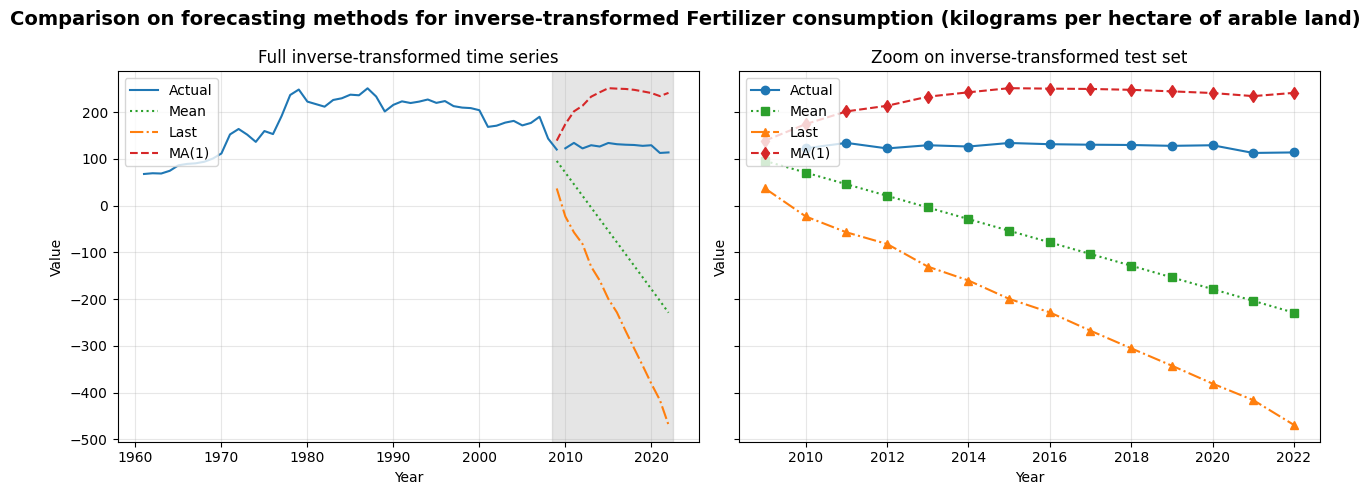


Indicator: Fertilizer consumption (% of fertilizer production)
ADF Statistic: -1.5620
p-value: 0.5027
Differenziazione n.1: ADF = -7.5112, p-value = 0.0000
Serie stazionaria dopo 1 differenziazioni.
Original data - Train: 49, Test: 13
Diff data - Train: 49, 
    Year      Value      Diff
0  1961  72.707716       NaN
1  1962  70.071359 -2.636357
2  1963  63.883735 -6.187623
3  1964  64.593354  0.709619
4  1965  68.034311  3.440957, 
 Test: 13, 
     Year       Value       Diff
49  2010  321.938671  69.597173
50  2011  370.632687  48.694016
51  2012  288.670032 -81.962655
52  2013  193.171051 -95.498981
53  2014  214.141293  20.970242


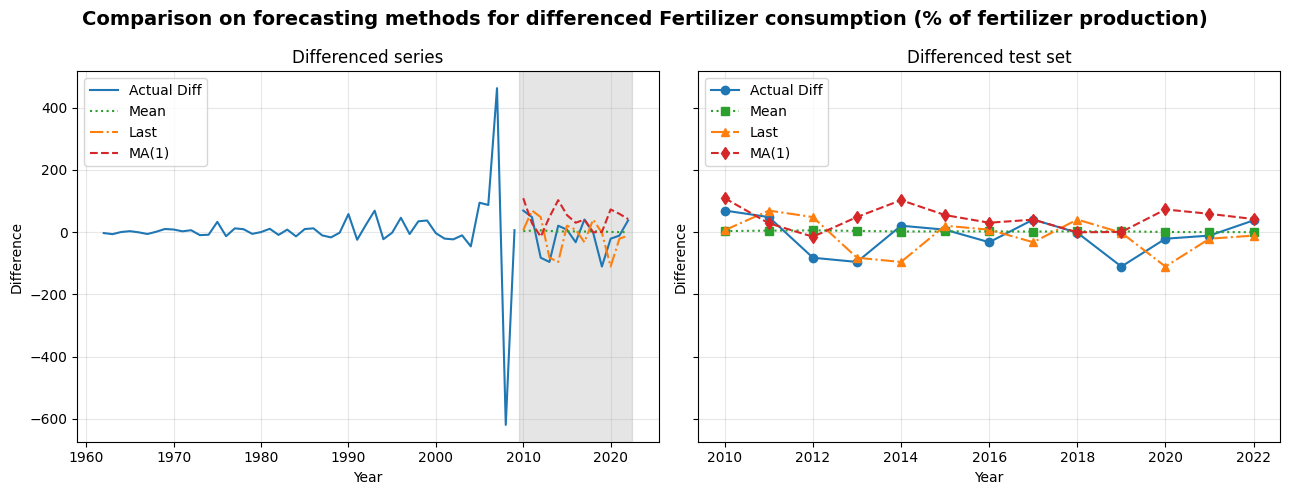


=== Year alignment check ===
test_results Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]
test_original Years: [2010, 2011, 2012, 2013, 2014]  ...  [2020, 2021, 2022]

=== quick inversion test on actual diffs (first k) ===
preds_diff: [ 69.59717347  48.69401645 -81.96265479 -95.4989814   20.97024184]
reconstructed: [166.34409033 261.2706085  274.23447189 191.69935388 130.13447771]
actual test_original first k values: [321.93867062 370.63268707 288.67003228 193.17105088 214.14129272]
last obs: [np.float64(252.3414971497565)]


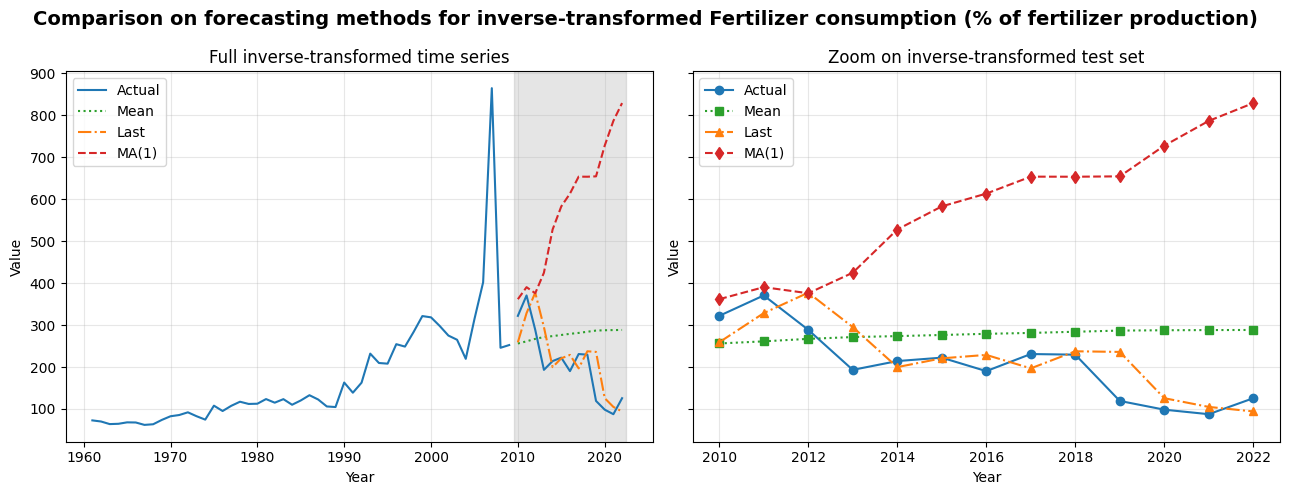

In [28]:
import warnings
warnings.filterwarnings("ignore", message="Non-stationary starting moving average parameters")
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon

    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df["Diff"][:i])
            pred_mean.extend([mean] * window)
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df["Diff"][:i].iloc[-1]
            pred_last_value.extend([last_value] * window)
        return pred_last_value

    elif method == 'MA':
        pred_MA = []
        for i in range(train_len, total_len, window):
            if len(df["Diff"][:i]) < 12:
                pred_MA.extend([np.nan] * window)
                continue
            try:
                model = SARIMAX(df["Diff"][:i].values, order=(0,0,1))
                res = model.fit(disp=False)
                predictions = res.get_prediction(start=i, end=i + window - 1)
                oos_pred = predictions.predicted_mean
                pred_MA.extend(oos_pred)
            except Exception as e:
                print(f"Errore AR per finestra {i}: {e}")
                pred_MA.extend([np.nan] * window)
        return pred_MA

indicators = ["Rural population growth (annual %)",
"Rural population",
"Agriculture, forestry, and fishing, value added (% of GDP)",
"Agriculture, forestry, and fishing, value added (current US$)",
"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",
"Cereal yield (kg per hectare)",
"Livestock production index (2014-2016 = 100)",
"Food production index (2014-2016 = 100)",
"Crop production index (2014-2016 = 100)",
"Cereal production (metric tons)",
"Permanent cropland (% of land area)",
"Land under cereal production (hectares)",
"Arable land (% of land area)",
"Arable land (hectares per person)",
"Arable land (hectares)",
"Agricultural land (% of land area)",
"Agricultural land (sq. km)",
"Fertilizer consumption (kilograms per hectare of arable land)",
"Fertilizer consumption (% of fertilizer production)"]

for indicator in indicators:
    print(f"\n{'='*80}")
    print(f"Indicator: {indicator}")

    df_temp = (
        df[df["Indicator Name"] == indicator]
        .melt(id_vars=["Indicator Name"], var_name="Year", value_name="Value")
        .assign(Year=lambda d: d["Year"].astype(int))
        .dropna(subset=["Value"])
        [["Year", "Value"]]
        .reset_index(drop=True)
    )

    try:
        result = adfuller(df_temp['Value'].dropna())
        adf_stat, p_value = result[0], result[1]
        print(f"ADF Statistic: {adf_stat:.4f}")
        print(f"p-value: {p_value:.4f}")
    except ValueError as e:
        print(f"Errore nel test ADF per {indicator}: {e}")
        continue

    # DIFFERENTATION VALUES ===========================================================================================
    split_idx = int(0.8*len(df_temp))
    train_original = df_temp.iloc[:split_idx]
    test_original = df_temp.iloc[split_idx:]
    train = pd.DataFrame(columns=["Year", "Value", "Diff"])
    test = pd.DataFrame(columns=["Year", "Value", "Diff"])
    diff_count = 0
    
    if (result[1] > 0.05) :
        current_series = df_temp['Value'].copy()
        while diff_count < 4:
            current_series = current_series.diff()
            result = adfuller(current_series.dropna())
            adf_stat, p_value = result[0], result[1]
            # print(current_series.head())
            print(f"Differenziazione n.{diff_count+1}: ADF = {adf_stat:.4f}, p-value = {p_value:.4f}")
            if p_value < 0.05:
                print(f"Serie stazionaria dopo {diff_count+1} differenziazioni.")
                df_temp['Diff'] = current_series
                train_len_diff = split_idx - diff_count
                train = df_temp.iloc[:train_len_diff]
                test = df_temp.iloc[train_len_diff:]
                break
            else:
                diff_count += 1

    TRAIN_LEN = len(train)
    HORIZON = len(test)

    print(f"Original data - Train: {len(train_original)}, Test: {len(test_original)}")
    print(f"Diff data - Train: {TRAIN_LEN}, \n {train.head()}, \n Test: {HORIZON}, \n {test.head()}")

    pred_mean = rolling_forecast(df_temp, TRAIN_LEN, HORIZON, 1, 'mean')
    pred_last_value = rolling_forecast(df_temp, TRAIN_LEN, HORIZON, 1, 'last')
    pred_MA = rolling_forecast(df_temp, TRAIN_LEN, HORIZON, 1, 'MA')

    test_results = test.copy()
    test_results['pred_mean'] = pred_mean[:HORIZON]
    test_results['pred_last_value'] = pred_last_value[:HORIZON]
    test_results['pred_MA'] = pred_MA[:HORIZON]
    # print(test_results.head())
    
    # PLOT COMPARISON ON FORECASTING METHODS on differenced time series ============================================================
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13,5))
    fig.suptitle(f"Comparison on forecasting methods for differenced {indicator}", fontsize=14, fontweight="bold")
    ax1.plot(train['Year'], train['Diff'])
    ax1.plot(test_results['Year'], test_results['Diff'], color = colors[0], linestyle='-', label='Actual Diff')
    ax1.plot(test_results['Year'], test_results['pred_mean'], color = colors[1], linestyle=':', label='Mean')
    ax1.plot(test_results['Year'], test_results['pred_last_value'], color = colors[2], linestyle='-.', label='Last')
    ax1.plot(test_results['Year'], test_results['pred_MA'], color = colors[3], linestyle='--', label='MA(1)')
    ax1.legend(loc=2)
    ax1.set_title("Differenced series")
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Difference')
    ax1.grid(True, alpha=0.3)
    start_year = int(test['Year'].iloc[0])
    end_year = int(test['Year'].iloc[-1])
    ax1.axvspan(start_year - 0.5, end_year + 0.5, color='#808080', alpha=0.2)
    
    ax2.plot(test_results['Year'], test_results['Diff'], color = colors[0], linestyle='-', label='Actual Diff', marker='o')
    ax2.plot(test_results['Year'], test_results['pred_mean'], color = colors[1], linestyle=':', label='Mean', marker='s')
    ax2.plot(test_results['Year'], test_results['pred_last_value'], color = colors[2], linestyle='-.', label='Last', marker='^')
    ax2.plot(test_results['Year'], test_results['pred_MA'], color = colors[3], linestyle='--', label='MA(1)', marker='d')
    ax2.legend(loc=2)
    ax2.set_title("Differenced test set")
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Difference')
    ax2.grid(True, alpha=0.3)
    
    ax1.tick_params(labelbottom=True)
    ax2.tick_params(labelbottom=True) 
    plt.setp(ax2.get_xticklabels(), visible=True)
    plt.tight_layout()
    plt.show()

    # INVERSE TRANSFORMATION ================================================================================================
    print("\n=== Year alignment check ===")
    print("test_results Years:", test_results['Year'].head(5).tolist(), " ... ", test_results['Year'].tail(3).tolist())
    print("test_original Years:", test_original['Year'].head(5).tolist(), " ... ", test_original['Year'].tail(3).tolist())
    # prendi i primi k valori di test_results['Diff'] non-NaN per il test
    k = min(5, len(test_results))
    preds_diff = test_results['Diff'].values[:k]  # questi sono i diff reali (notare che in pratica potresti usare le predizioni)
    reconstructed = invert_forecast(preds_diff, n_levels, last_obs)
    print("\n=== quick inversion test on actual diffs (first k) ===")
    print("preds_diff:", preds_diff)
    print("reconstructed:", reconstructed)
    print("actual test_original first k values:", test_original['Value'].values[:k])


    n_levels = diff_count + 1 
    series = train_original['Value'].copy()
    last_obs = [series.iloc[-1]]  # livello 0
    print(f"last obs: {last_obs}")
    temp = series.copy()
    for _ in range(1, n_levels):
        temp = temp.diff()
        # check che ci siano valori dopo dropna
        non_na = temp.dropna()
        if non_na.empty:
            raise ValueError(f"Impossibile trovare last_obs per livello {_}: serie troppo corta.")
        last_obs.append(non_na.iloc[-1])

    # funzione robusta che inverte predizioni preservando NaN e lavorando per segmenti contigui
    def invert_forecast(preds, n_levels, last_obs):
        preds = np.asarray(preds, dtype=float)
        out = np.full_like(preds, np.nan, dtype=float)
        notnan = ~np.isnan(preds)
        if not np.any(notnan):
            return out

        idxs = np.where(notnan)[0]
        # splitta in segmenti contigui
        splits = np.split(idxs, np.where(np.diff(idxs) != 1)[0] + 1)
        for seg in splits:
            start = seg[0]
            end = seg[-1] + 1
            block = preds[start:end].astype(float)
            vals = block.copy()
            # risali i livelli (dall'ultimo diff al livello 0)
            for level in range(n_levels, 0, -1):
                vals = np.cumsum(vals) + last_obs[level - 1]
            out[start:end] = vals
        return out

    # inverse-transform each forecast column
    test_results['pred_mean_levels'] = invert_forecast(test_results['pred_mean'].values, n_levels, last_obs)
    test_results['pred_last_value_levels'] = invert_forecast(test_results['pred_last_value'].values, n_levels, last_obs)
    test_results['pred_MA_levels'] = invert_forecast(test_results['pred_MA'].values, n_levels, last_obs)
    
    # # Allinea con i valori originali del test set
    # # I valori originali del test set iniziano da split_idx
    # test_actual_values = test_original['Value'].values

    # valid_idx = ~np.isnan(test_results['pred_MA_levels'])
    # if np.sum(valid_idx) > 0:
    #     test_results = test_results[valid_idx]
    #     actual_values_valid = test_actual_values[valid_idx]
        
    #     mae_mean = mean_absolute_error(actual_values_valid, test_results['pred_mean_levels'])
    #     mae_last = mean_absolute_error(actual_values_valid, test_results['pred_last_value_levels'])
    #     mae_ar = mean_absolute_error(actual_values_valid, test_results['pred_MA_levels'])

    #     mse_mean = mean_squared_error(actual_values_valid, test_results['pred_mean_levels'])
    #     mse_last = mean_squared_error(actual_values_valid, test_results['pred_last_value_levels'])
    #     mse_ar = mean_squared_error(actual_values_valid, test_results['pred_MA_levels'])
        
    #     print(f"MAE livello originale -> mean: {mae_mean:.3f}, last: {mae_last:.3f}, MA(1): {mae_ar:.3f}")
    #     print(f"MSE livello originale -> mean: {mse_mean:.3f}, last: {mse_last:.3f}, MA(1): {mse_ar:.3f}")

    # test['pred_mean_levels'] = np.cumsum(test['pred_mean']) + last_train_value
    # test['pred_last_value_levels'] = np.cumsum(test['pred_last_value']) + last_train_value
    # test['pred_AR_levels'] = np.cumsum(test['pred_AR']) + last_train_value
    
    # # mae e mse a confronto
    # mae_mean = mean_absolute_error(test['Value'], test['pred_mean_levels'])
    # mae_last = mean_absolute_error(test['Value'], test['pred_last_value_levels'])
    # mae_ar = mean_absolute_error(test['Value'], test['pred_AR_levels'])

    # mse_mean = mean_squared_error(test['Value'], test['pred_mean_levels'])
    # mse_last = mean_squared_error(test['Value'], test['pred_last_value_levels'])
    # mse_ar = mean_squared_error(test['Value'], test['pred_AR_levels'])
    
    # print(f"MAE livello originale -> mean: {mae_mean:.3f}, last: {mae_last:.3f}, AR(2): {mae_ar:.3f}")
    # print(f"MSE livello originale -> mean: {mse_mean:.3f}, last: {mse_last:.3f}, AR(2): {mse_ar:.3f}")
    
    # PLOT COMPARISON ON FORECASTING METHODS on inverse-trasnformed time series
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13,5))
    fig.suptitle(f"Comparison on forecasting methods for inverse-transformed {indicator}", fontsize=14, fontweight="bold")
    ax1.plot(train_original['Year'], train_original['Value'])
    ax1.plot(test_original['Year'], test_original['Value'], color = colors[0], linestyle='-', label='Actual')
    ax1.plot(test_results['Year'], test_results['pred_mean_levels'], color = colors[1], linestyle=':', label='Mean')
    ax1.plot(test_results['Year'], test_results['pred_last_value_levels'], color = colors[2], linestyle='-.', label='Last')
    ax1.plot(test_results['Year'], test_results['pred_MA_levels'], color = colors[3], linestyle='--', label='MA(1)')
    ax1.legend(loc=2)
    ax1.set_title("Full inverse-transformed time series")
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Value')
    ax1.grid(True, alpha=0.3)
    start_year = int(test['Year'].iloc[0])
    end_year = int(test['Year'].iloc[-1])
    ax1.axvspan(start_year - 0.5, end_year + 0.5, color='#808080', alpha=0.2)
    
    ax2.plot(test_original['Year'], test_original['Value'], color = colors[0], linestyle='-', label='Actual', marker='o')
    ax2.plot(test_results['Year'], test_results['pred_mean_levels'], color = colors[1], linestyle=':', label='Mean', marker='s')
    ax2.plot(test_results['Year'], test_results['pred_last_value_levels'], color = colors[2], linestyle='-.', label='Last', marker='^')
    ax2.plot(test_results['Year'], test_results['pred_MA_levels'], color = colors[3], linestyle='--', label='MA(1)', marker='d')
    ax2.legend(loc=2)
    ax2.set_title("Zoom on inverse-transformed test set")
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Value')
    ax2.grid(True, alpha=0.3)
    
    ax1.tick_params(labelbottom=True)
    ax2.tick_params(labelbottom=True) 
    plt.setp(ax2.get_xticklabels(), visible=True)
    plt.tight_layout()
    plt.show()

==================================================================================

KeyError: 'Diff'

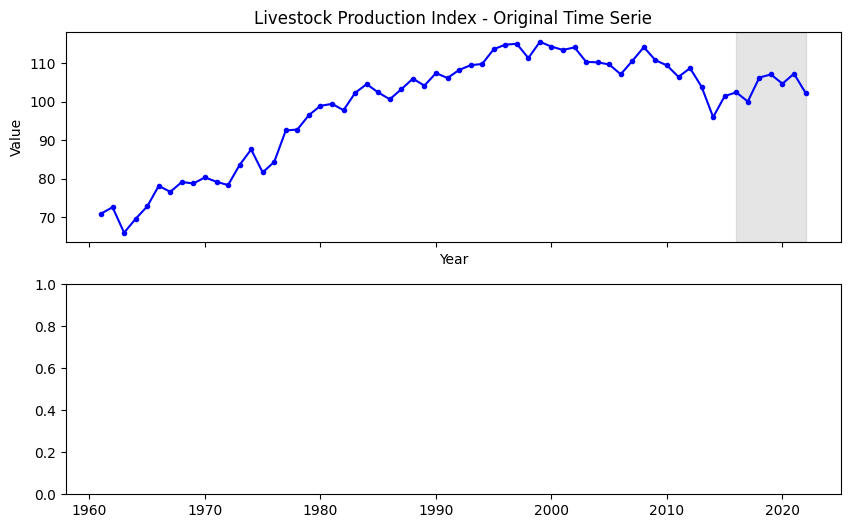

In [5]:
import matplotlib.pyplot as plt

# PLOT ORIGINAL TIME SERIE VS DIFFERENTIATED TIME SERIE
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

ax1.plot(df_livestock['Year'], df_livestock['Value'], 'b-', marker='.')
ax1.set_xlabel('Year')
ax1.set_ylabel('Value')
ax1.set_title('Livestock Production Index - Original Time Serie')
ax1.axvspan(2016, 2022, color='#808080', alpha=0.2)

ax2.plot(df_livestock['Year'], df_livestock['Diff'], 'r-', marker='.')
ax2.set_xlabel('Year')
ax2.set_ylabel('Value')
ax2.set_title('Livestock Production Index - One-order Differentiated Time Serie')
ax2.axvspan(2016, 2022, color='#808080', alpha=0.2)

ax1.tick_params(labelbottom=True)
ax2.tick_params(labelbottom=True) 
plt.setp(ax2.get_xticklabels(), visible=True) 

plt.tight_layout()
plt.show()

In [ ]:
# DIVISION OF LIVESTOCK PRODUCTION INDEX TIME SERIE IN TRAINING AND TEST SET (90-10)
df_livestock['Diff'] = df_livestock['Diff'].apply(pd.to_numeric, errors='coerce').to_frame()

train = df_livestock[:int(0.9*len(df_livestock))]
test = df_livestock[int(0.9*len(df_livestock)):]

# tot 62:  train 55, test 7
print(len(train))
print(len(test))

55
7


In [ ]:
# ROLLING FORECAST TO MODEL MOVING AVERAGE
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    if method == 'mean':
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i])
            pred_mean.extend(mean for _ in range(window))
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
        return pred_last_value
    
    elif method == 'MA':
        pred_MA = []
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(0,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        return pred_MA
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 1

pred_mean = rolling_forecast(df_livestock['Diff'], TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_livestock['Diff'], TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA = rolling_forecast(df_livestock['Diff'], TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA'] = pred_MA

pred_df.head()

Year   Value  Diff  pred_mean  pred_last_value   pred_MA
55  2016  102.47  0.96   0.566667             5.49  0.503091
56  2017  100.09 -2.38   0.573818             0.96 -0.494642
57  2018  106.33  6.24   0.521071            -2.38  0.063690
58  2019  107.13  0.80   0.621404             6.24 -0.219083
59  2020  104.73 -2.40   0.624483             0.80 -0.785769

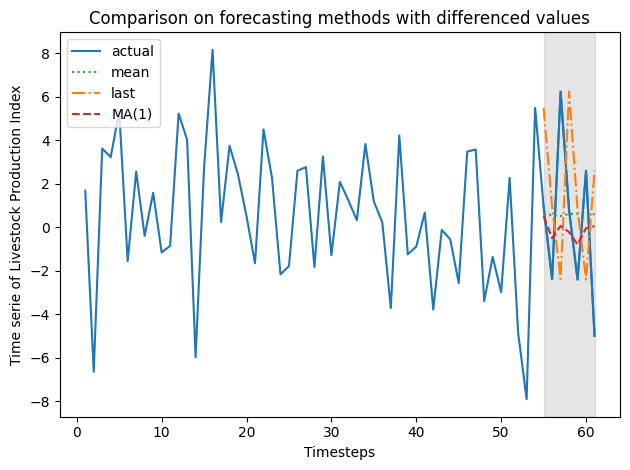

In [ ]:
# PLOT COMPARISON ON FORECASTING METHODS WITH DIFFERENCED VALUES
fig, ax = plt.subplots()
ax.plot(df_livestock['Diff'])
ax.plot(pred_df['Diff'], color = colors[0], linestyle='-', label='actual')
ax.plot(pred_df['pred_mean'], color = colors[1], linestyle=':', label='mean')
ax.plot(pred_df['pred_last_value'], color = colors[2], linestyle='-.', label='last')
ax.plot(pred_df['pred_MA'], color = colors[3], linestyle='--', label='MA(1)')
ax.legend(loc=2)
ax.set_title("Comparison on forecasting methods with differenced values")
ax.set_xlabel('Timesteps')
ax.set_ylabel('Time serie of Livestock Production Index')
ax.axvspan(55, 61, color='#808080', alpha=0.2)

plt.tight_layout()

In [ ]:
# MAE DIFF PREDICTIONS
mae_mean = mean_absolute_error(df_livestock['Diff'].iloc[55:], pred_df['pred_mean'].iloc[0:])
mae_last = mean_absolute_error(df_livestock['Diff'].iloc[55:], pred_df['pred_last_value'].iloc[0:])
mae_MA = mean_absolute_error(df_livestock['Diff'].iloc[55:], pred_df['pred_MA'].iloc[0:])

print(f"MAE DIFF PREDICTIONS = mean: {mae_mean:.2f}, last: {mae_last:.2f}, MA: {mae_MA:.2f}")

MAE DIFF PREDICTIONS = mean: 2.84, last: 5.39, MA: 2.69


In [ ]:
# MSE DIFF PREDICTIONS
mse_mean = mean_squared_error(pred_df['Diff'], pred_df['pred_mean'])
mse_last = mean_squared_error(pred_df['Diff'], pred_df['pred_last_value'])
mse_MA = mean_squared_error(pred_df['Diff'], pred_df['pred_MA'])

print(f"MSE DIFF PREDICTIONS = mean: {mse_mean:.2f}, last: {mse_last:.2f}, MA: {mse_MA:.2f}")

MSE DIFF PREDICTIONS = mean: 12.31, last: 32.63, MA: 11.14


In [ ]:
# # Plot MSE DIFF
# fig, ax = plt.subplots()
# x = ['mean', 'last_value', 'MA(1)']
# y = [mse_mean, mse_last, mse_MA]
# colors = ['green', 'black', 'red']

# ax.bar(x, y, width=0.5, color=colors)
# ax.set_xlabel('Methods')
# ax.set_xlim(-0.5, len(x) - 0.5)
# ax.margins(x=0)
# ax.set_title("Mean Squared Error (MSE) comparison")
# ax.set_ylabel('MSE')
# ax.set_ylim(0, 35)
# for index, value in enumerate(y):
#     plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')
# plt.tight_layout()

In [ ]:
# INVERSE TRANSFORMATION OF DIFFERENCED VALUES

# start_value = df_livestock.loc[54, 'Value']
# df_livestock.loc[55:, 'pred_mean_undiff'] = start_value + pred_df['pred_mean'].cumsum().values

df_livestock['pred_mean_undiff'] = np.nan
df_livestock['pred_last_undiff'] = np.nan
df_livestock['pred_MA_undiff'] = np.nan

start_value = df_livestock.loc[54, 'Value']  # ultimo valore "reale" prima del forecast

pred_mean_undiff = [start_value]
for val in pred_df['pred_mean']:
    pred_mean_undiff.append(pred_mean_undiff[-1] + val)

pred_last_undiff = [start_value]
for val in pred_df['pred_last_value']:
    pred_last_undiff.append(pred_last_undiff[-1] + val)

pred_MA_undiff = [start_value]
for val in pred_df['pred_MA']:
    pred_MA_undiff.append(pred_MA_undiff[-1] + val)

df_livestock.loc[55:55+len(pred_df)-1, 'pred_mean_undiff'] = pred_mean_undiff[1:]
df_livestock.loc[55:55+len(pred_df)-1, 'pred_last_undiff'] = pred_last_undiff[1:]
df_livestock.loc[55:55+len(pred_df)-1, 'pred_MA_undiff'] = pred_MA_undiff[1:]

print(df_livestock.tail())

    Year   Value  Diff  pred_mean_undiff  pred_last_undiff  pred_MA_undiff
57  2018  106.33  6.24        103.171556            105.58      101.582139
58  2019  107.13  0.80        103.792960            111.82      101.363056
59  2020  104.73 -2.40        104.417443            112.62      100.577287
60  2021  107.33  2.60        104.990663            110.22      100.537056
61  2022  102.34 -4.99        105.597663            112.82      100.589697


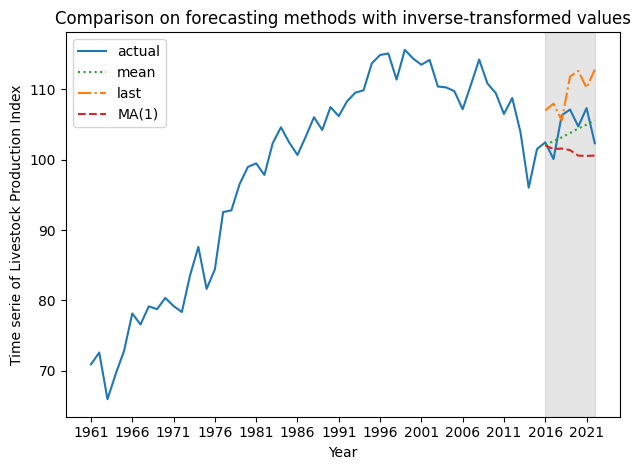

In [ ]:
# Plot comparison on forecasting methods with inverse-trasnformed values
fig, ax = plt.subplots()
ax.plot(df_livestock['Value'], color=colors[0], linestyle='-', label='actual')
ax.plot(df_livestock['pred_mean_undiff'], color=colors[1], linestyle=':', label='mean')
ax.plot(df_livestock['pred_last_undiff'], color=colors[2], linestyle='-.', label='last')
ax.plot(df_livestock['pred_MA_undiff'], color=colors[3], linestyle='--', label='MA(1)')
ax.legend(loc=2)
ax.set_title("Comparison on forecasting methods with inverse-transformed values")
ax.set_xlabel('Year')
ax.set_ylabel('Time serie of Livestock Production Index')
ax.set_xticks(range(0, len(df_livestock), 5)) 
ax.set_xticklabels(df_livestock['Year'][::5])
ax.axvspan(55, 61, color='#808080', alpha=0.2)
plt.tight_layout()

In [ ]:
# MAE UNDIFF PREDICTIONS
mae_mean_undiff = mean_absolute_error(df_livestock['Value'].iloc[55:], df_livestock['pred_mean_undiff'].iloc[55:])
mae_last_undiff = mean_absolute_error(df_livestock['Value'].iloc[55:], df_livestock['pred_last_undiff'].iloc[55:])
mae_MA_undiff = mean_absolute_error(df_livestock['Value'].iloc[55:], df_livestock['pred_MA_undiff'].iloc[55:])

print(f"MAE UNDIFF PREDICTIONS = mean: {mae_mean_undiff:.2f}, last: {mae_last_undiff:.2f}, MA: {mae_MA_undiff:.2f}")

MAE UNDIFF PREDICTIONS = mean: 2.19, last: 5.59, MA: 3.59


In [ ]:
# MSE UNDIFF PREDICTION
mse_mean_undiff = mean_squared_error(df_livestock['Value'].iloc[55:], df_livestock['pred_mean_undiff'].iloc[55:])
mse_last_undiff = mean_squared_error(df_livestock['Value'].iloc[55:], df_livestock['pred_last_undiff'].iloc[55:])
mse_MA_undiff = mean_squared_error(df_livestock['Value'].iloc[55:], df_livestock['pred_MA_undiff'].iloc[55:])

print(f"MSE UNDIFF PREDICTION = mean: {mse_mean_undiff:.2f}, last: {mse_last_undiff:.2f}, MA: {mse_MA_undiff:.2f}")

MSE UNDIFF PREDICTION = mean: 6.29, last: 40.78, MA: 17.79


In [ ]:
# # Plot MAE UNDIFF
# fig, ax = plt.subplots()
# x = ['mean', 'last_value', 'MA(1)']
# y = [mae_mean_undiff, mae_last_undiff, mae_MA_undiff]
# colors = ['green', 'black', 'red']

# ax.bar(x, y, width=0.5, color=colors)
# ax.set_xlabel('Methods')
# ax.set_xlim(-0.5, len(x) - 0.5)
# ax.margins(x=0)
# ax.set_title("Mean Absolute Error (MAE) comparison")
# ax.set_ylabel('MAE')
# ax.set_ylim(0, 35)
# for index, value in enumerate(y):
#     plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')
# plt.tight_layout()

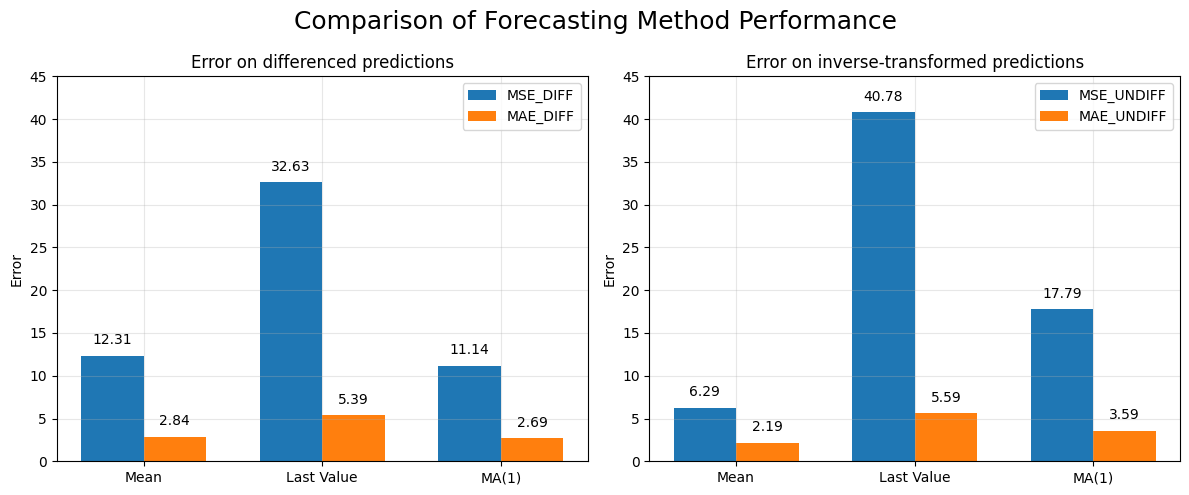

In [ ]:
results = pd.DataFrame({
    'Method': ['Mean', 'Last Value', 'MA(1)'],
    'MSE_DIFF': [mse_mean, mse_last, mse_MA],
    'MAE_DIFF': [mae_mean, mae_last, mae_MA],
    'MSE_UNDIFF': [mse_mean_undiff, mse_last_undiff, mse_MA_undiff],
    'MAE_UNDIFF': [mae_mean_undiff, mae_last_undiff, mae_MA_undiff]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

x = np.arange(len(results['Method']))
width = 0.35

# GRAFICO MSE_DIFF E MAE_DIFF
axes[0].bar(x - width/2, results['MSE_DIFF'], width, label='MSE_DIFF')
axes[0].bar(x + width/2, results['MAE_DIFF'], width, label='MAE_DIFF')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results['Method'])
axes[0].set_title("Error on differenced predictions")
axes[0].set_ylabel("Error")
axes[0].set_ylim(0, 45)
axes[0].legend()
axes[0].grid(alpha=0.3)

for idx in x:
    axes[0].text(idx - width/2, results['MSE_DIFF'][idx] + 1, f"{results['MSE_DIFF'][idx]:.2f}", ha='center', va='bottom')
    axes[0].text(idx + width/2, results['MAE_DIFF'][idx] + 1, f"{results['MAE_DIFF'][idx]:.2f}", ha='center', va='bottom')

# GRAFICO MSE_UNDIFF E MAE_UNDIFF
axes[1].bar(x - width/2, results['MSE_UNDIFF'], width, label='MSE_UNDIFF')
axes[1].bar(x + width/2, results['MAE_UNDIFF'], width, label='MAE_UNDIFF')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results['Method'])
axes[1].set_title("Error on inverse-transformed predictions")
axes[1].set_ylabel("Error")
axes[1].set_ylim(0, 45)
axes[1].legend()
axes[1].grid(alpha=0.3)

for idx in x:
    axes[1].text(idx - width/2, results['MSE_UNDIFF'][idx] + 1, f"{results['MSE_UNDIFF'][idx]:.2f}", ha='center', va='bottom')
    axes[1].text(idx + width/2, results['MAE_UNDIFF'][idx] + 1, f"{results['MAE_UNDIFF'][idx]:.2f}", ha='center', va='bottom')

plt.suptitle("Comparison of Forecasting Method Performance", fontsize=18)
plt.tight_layout()
plt.show()